# CORRELATION ANALYSIS
I need to narrow down the variables in the analysis statistically and logically. I have many that are NA's I would like to remove them if possible. I will try to make a few different datasets that have different limitations. 

### Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn import cluster
import sklearn
import seaborn as sns
from sklearn import decomposition
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# allow us to see all columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("../Datasets_P1/df_Cost.csv")
df.sample(5)

C:\Users\perreaultl1\AppData\Local\Temp\ipykernel_16124\3932104159.py:1: DtypeWarning: Columns (8,89) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Datasets_P1/df_Cost.csv")


rpt_rec_num  Provider_CCN                         Facility_Name  \
81144      1302939        366186                        HUMILITY HOUSE   
40685      1218712         15104                SOUTHLAND NURSING HOME   
91389      1305875        676419  LA HACIENDA DE PAZ REHABILITATION AN   
94301      1326484        325047                    CASA DE ORO CENTER   
30807      1181269        395675       WAYNESBURG HEALTHCARE AND REHAB   

             Street_Address        City State_Code Zip_Code    County  \
81144      755 OHLTOWN ROAD  AUSTINTOWN         OH    44515  MAHONING   
40685   500 SHIVERS TERRACE      MARION         AL    36756     PERRY   
91389    3333 BOB ROGERS DR  EAGLE PASS         TX    78852  MAVERICK   
94301  1005 LUJAN HILL ROAD  LAS CRUCES         NM    88007  DONA ANA   
30807     300 CENTER AVENUE  WAYNESBURG         PA    15370    GREENE   

      Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
81144              49660.0                  U             01/01/2020   
40685              99901.0                  R               7/1/2017   
91389              99945.0                  R             01/01/2021   
94301              29740.0                  U             01/01/2021   
30807              99939.0                  R              10/1/2016   

      Fiscal_Year_End_Date  Type_of_Control  Accounts_Receivable  \
81144           12/31/2020              2.0             460848.0   
40685            6/30/2018              4.0             369304.0   
91389           03/31/2021              4.0              71636.0   
94301           12/31/2021              4.0            1312140.0   
30807           12/31/2016              4.0             802477.0   

       Accounts_payable  Buildings  Cash_on_hand_and_in_banks  \
81144         1147427.0  8266414.0                     6071.0   
40685          110865.0    13420.0                   -97517.0   
91389           90453.0        NaN                    42082.0   
94301          637390.0        NaN                     1086.0   
30807          171704.0        NaN                    73393.0   

       General_fund_balance  Gross_Revenue  Inpatient_PPS_Amount  \
81144             2281077.0      7365057.0              423354.0   
40685            -3063609.0      4463687.0              282256.0   
91389              506227.0      2270415.0              659581.0   
94301             6704392.0     12197744.0              963692.0   
30807               15676.0      2801273.0              344799.0   

       Inpatient_Revenue  Less_Total_Operating_Expense  \
81144          7365057.0                     9189018.0   
40685          4463687.0                     6247270.0   
91389          2026169.0                     1842889.0   
94301         12197744.0                    12647929.0   
30807          2801273.0                     2064098.0   

       Less_discounts_on_patients  Major_movable_equipment  Net_Income  \
81144                   1876450.0                      NaN  -2915951.0   
40685                   -846572.0                      NaN   -896509.0   
91389                    155851.0                      NaN    610012.0   
94301                  -1154705.0                 476157.0    818619.0   
30807                    932455.0                  20228.0     90675.0   

       Net_Patient_Revenue  Number_of_Beds  Other_Assets  \
81144            5488607.0            70.0      139895.0   
40685            5310259.0            91.0           NaN   
91389            2114564.0           104.0           NaN   
94301           13352449.0           158.0    10415494.0   
30807            1868818.0           111.0        -570.0   

       Other_current_liabilities  Overhead_Non_Salary_Costs  \
81144                   486395.0                  5319278.0   
40685                   173625.0                  3552562.0   
91389                        NaN                  1073434.0   
94301                   715254.0                  8007343.0   
30807      

In [4]:
# Count the total number of columns in df
num_columns = df.shape[1]

# Display the count
print(f"Total number of variables in df: {num_columns}")

Total number of variables in df: 93


C:\Users\perreaultl1\AppData\Local\Temp\ipykernel_16124\3148070167.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(df_filled[col].median(), inplace=True)
C:\Users\perreaultl1\AppData\Local\Temp\ipykernel_16124\3148070167.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

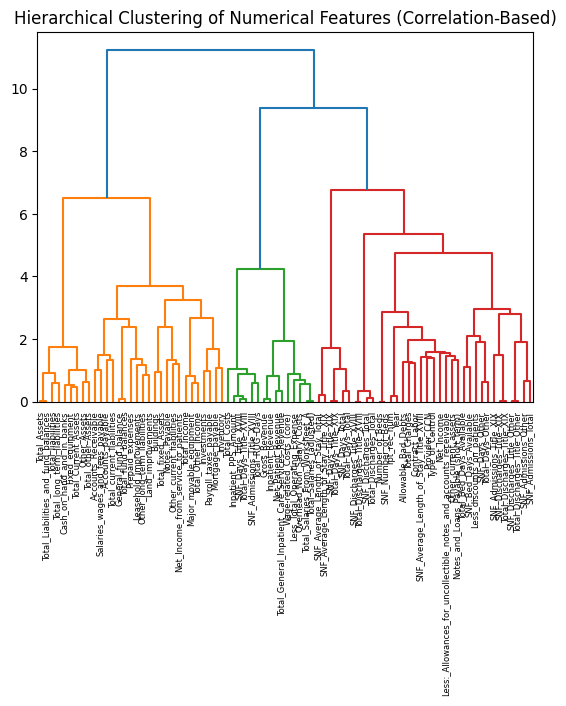

Correlation-Based Feature Clusters: {'Cluster 1': ['Cash_on_hand_and_in_banks', 'Other_Assets', 'Total_Assets', 'Total_liabilities', 'Total_other_Assets', 'Fixed_equipment', 'Total_long_term_liabilities', 'Total_Liabilities_and_fund_balances', 'Total_Current_Assets'], 'Cluster 2': ['Accounts_Receivable', 'Accounts_payable', 'Salaries_wages_and_fees_payable', 'Total_current_liabilities'], 'Cluster 3': ['General_fund_balance', 'Total_fund_balances', 'Other_long_term_liabilities', 'Land_improvements', 'Leasehold_improvements', 'Prepaid_expenses'], 'Cluster 4': ['Buildings', 'Other_current_liabilities', 'Total_fixed_Assets', 'Net_Income_from_service_to_patients', 'Notes_Payable'], 'Cluster 5': ['Major_movable_equipment', 'Total_Income', 'Total_Other_Income'], 'Cluster 6': ['Investments', 'Payroll_taxes_payable', 'Mortgage_payable', 'Inventory'], 'Cluster 7': ['Inpatient_PPS_Amount', 'SNF_Admissions_Title_XVIII', 'SNF_Days_Title_XVIII', 'Total_Costs', 'Total_Days_Title_XVIII', 'Total_RUG_Da

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Ensure target column exists
target = "Net_Income"
if target not in df.columns:
    raise ValueError(f"Target variable '{target}' not found in the dataset.")

# Handling missing values: Fill NAs with median (for numerical) or mode (for categorical)
df_filled = df.copy()
for col in df_filled.columns:
    if df_filled[col].dtype == 'object':
        df_filled[col].fillna(df_filled[col].mode()[0], inplace=True)
    else:
        df_filled[col].fillna(df_filled[col].median(), inplace=True)

# Separate numerical and categorical columns
num_cols = df_filled.select_dtypes(include=[np.number]).columns
cat_cols = df_filled.select_dtypes(include=['object']).columns

### 1. Correlation-Based Clustering ###
# Compute correlation matrix
corr_matrix = df_filled[num_cols].corr()

# Apply hierarchical clustering
linkage_matrix = linkage(1 - np.abs(corr_matrix), method='ward')
dendrogram(linkage_matrix, labels=num_cols, leaf_rotation=90)
plt.title("Hierarchical Clustering of Numerical Features (Correlation-Based)")
plt.show()

# Assign clusters (tune 't' for granularity)
clusters = fcluster(linkage_matrix, t=2.5, criterion='distance')
clustered_features = {f'Cluster {c}': [] for c in np.unique(clusters)}
for col, cluster in zip(num_cols, clusters):
    clustered_features[f'Cluster {cluster}'].append(col)

print("Correlation-Based Feature Clusters:", clustered_features)


In [6]:
# remove this bc it is the same as another column
df = df.drop(columns=['Total_Salaries_From_Worksheet_A'])

# FIRST Dataset
I will heavily remove NA filled variables especially if they are correlated to another variable that has higher correlation with the target

So I will be seperating the dataset by groups that I think are relevant to each other and that I know have lots of NAs based on previous analysis

In [7]:
# Select columns that contain the word 'assets' and also include 'Net_Income'
assets_cols = [col for col in df.columns if 'assets' in col.lower()]
assets_cols.append('Net_Income')  # Add 'Net_Income' to the list

# Create a new DataFrame with only the selected columns
group = df[assets_cols]

# Display the selected columns

group.head()


Other_Assets  Total_Assets  Total_fixed_Assets  Total_other_Assets  \
0           NaN      765020.0             55061.0           -729268.0   
1       36000.0     1687456.0            671306.0             36000.0   
2           NaN      244239.0                 NaN                 NaN   
3           NaN     1830758.0             26949.0             74985.0   
4           NaN      807209.0                 NaN                 NaN   

   Other_current_assets  Total_Current_Assets  Net_Income  
0                   NaN             1439227.0    311430.0  
1                   NaN              980150.0   -588469.0  
2                   NaN              244239.0    -47859.0  
3                   NaN             1728824.0    -63638.0  
4                   NaN              807209.0     -1613.0

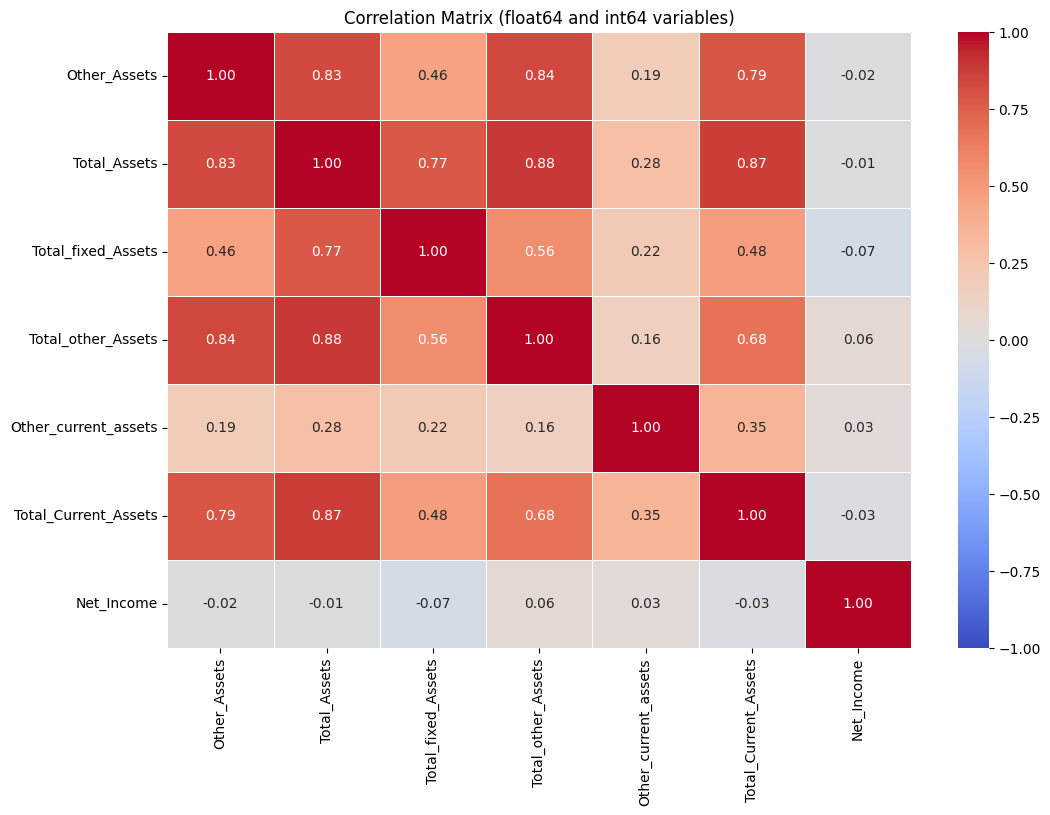

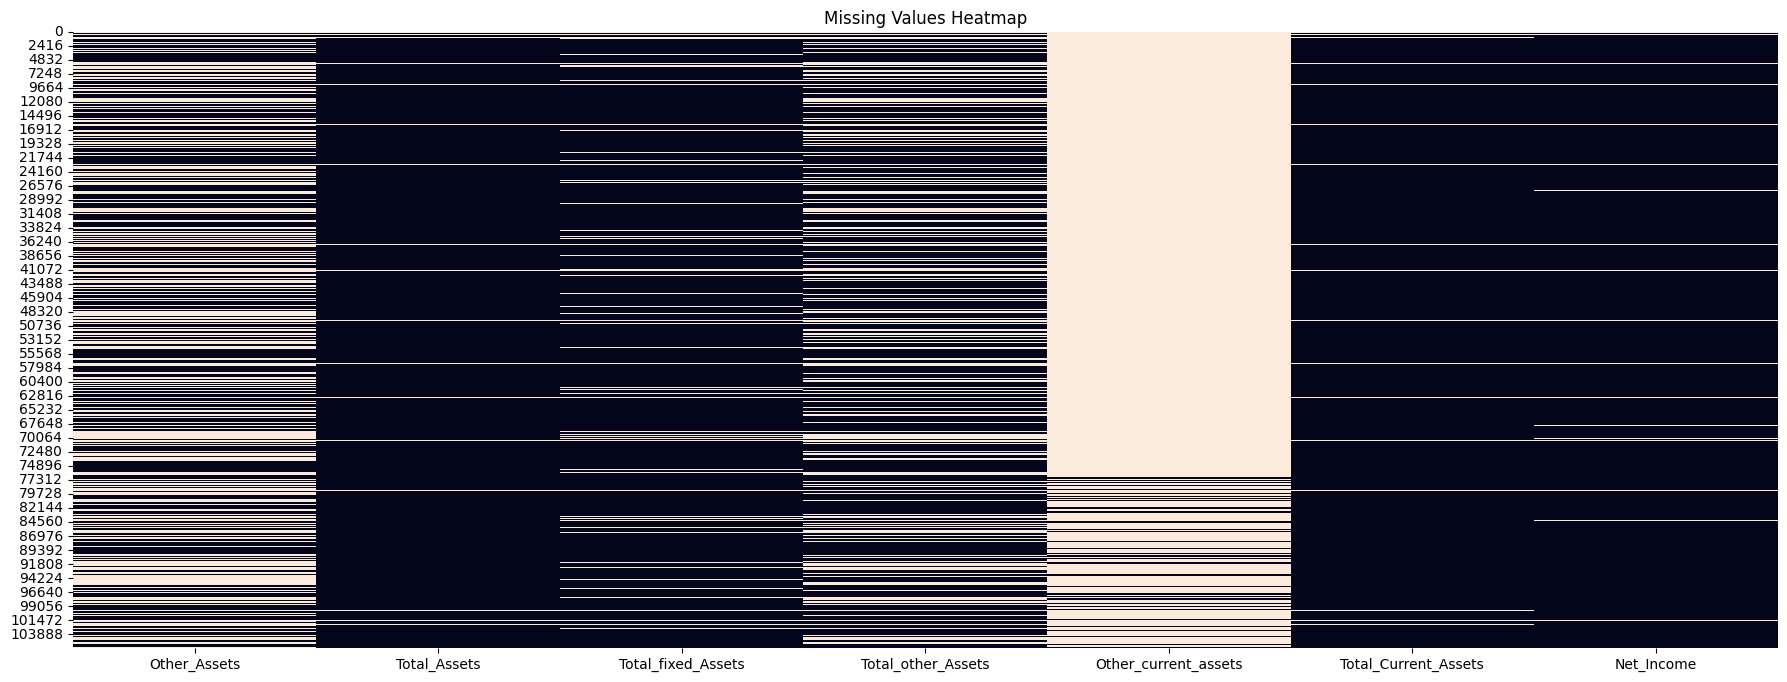

In [8]:
# Select numerical columns (float64 and int64)
num_cols = group.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


DROP the useless datasets

In [9]:
# Calculate percentage of missing values for each column
missing_percentage = group.isnull().mean() * 100

# Get the columns with more than 50% missing values
cols_to_check = missing_percentage[missing_percentage > 50].index

# Compute the correlation matrix for numerical columns
corr_matrix = group.select_dtypes(include=['float64', 'int64']).corr()

# Get the correlation of each column with 'Net_Income'
correlation_with_net_income = corr_matrix['Net_Income'].sort_values(ascending=False)

# Identify columns to drop
columns_to_drop = []
for col in cols_to_check:
    # Check if any other column has a higher correlation with Net_Income
    if correlation_with_net_income[col] < correlation_with_net_income.iloc[0]:  # Compare with the highest correlation
        columns_to_drop.append(col)

# Drop the identified columns from the dataset
group_cleaned = df.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(f"Columns dropped due to >50% NA and lower correlation with Net_Income: {columns_to_drop}")

# Optionally, display the cleaned dataset
# print(group_cleaned.head())


Columns dropped due to >50% NA and lower correlation with Net_Income: ['Other_current_assets']


### Another one

In [10]:
# Select columns that contain the word 'assets' and also include 'Net_Income'
assets_cols = [col for col in df.columns if 'liabilities' in col.lower()]
assets_cols.append('Net_Income')  # Add 'Net_Income' to the list

# Create a new DataFrame with only the selected columns
group = df[assets_cols]

# Display the selected columns

group.head()

Other_current_liabilities  Total_current_liabilities  Total_liabilities  \
0                     5667.0                   453591.0           453590.0   
1                  2596536.0                  2765768.0          6584403.0   
2                    25982.0                   192098.0           192098.0   
3                    97267.0                  1824376.0          1824376.0   
4                    50688.0                   808822.0           808822.0   

   Total_long_term_liabilities  Other_long_term_liabilities  \
0                         -1.0                          NaN   
1                    3818635.0                          NaN   
2                          0.0                          NaN   
3                          0.0                          NaN   
4                          0.0                          NaN   

   Total_Liabilities_and_fund_balances  Net_Income  
0                             765020.0    311430.0  
1                            1687456.0   -588469.0  
2                             244239.0    -47859.0  
3                            1830758.0    -63638.0  
4                             807209.0     -1613.0

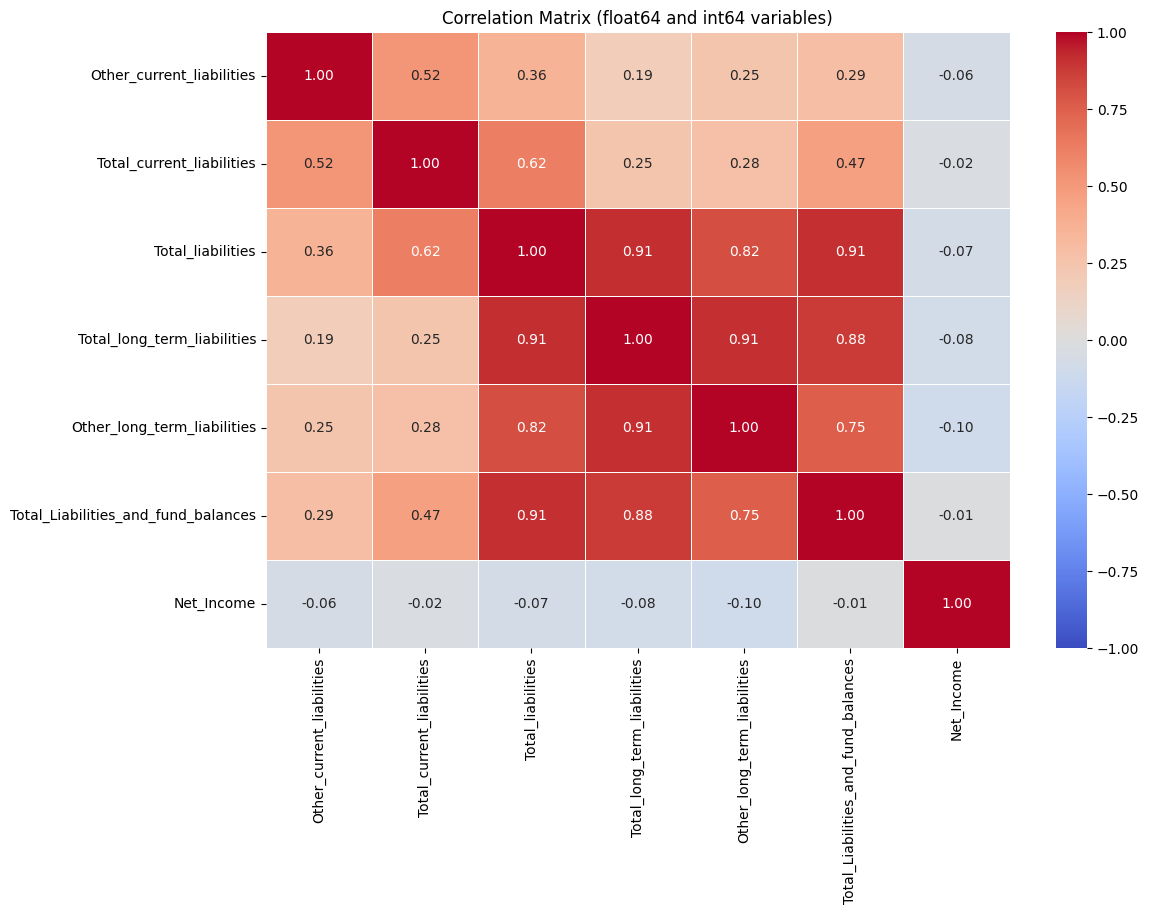

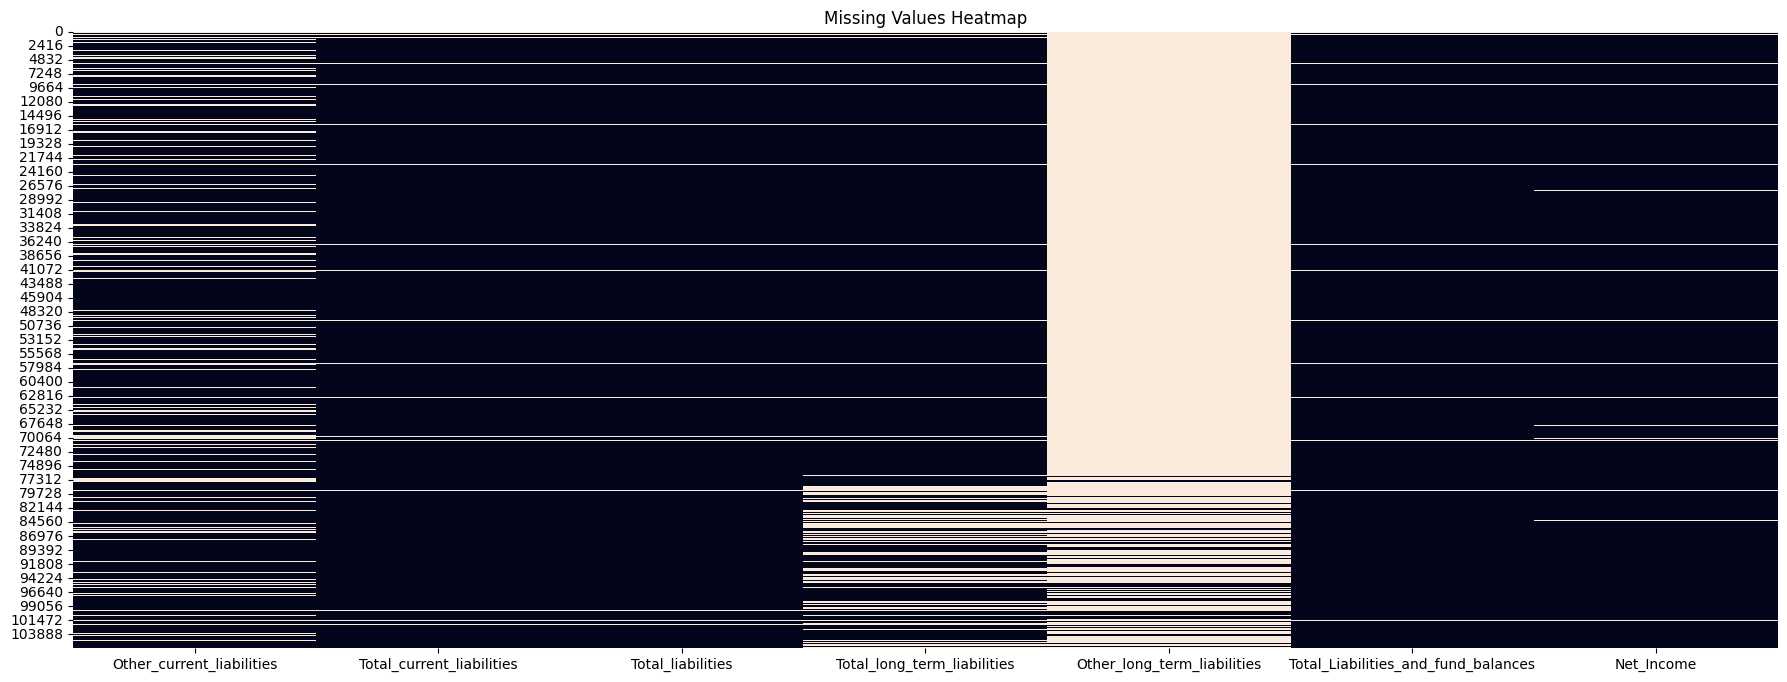

In [11]:
# Select numerical columns (float64 and int64)
num_cols = group.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [12]:
# Calculate percentage of missing values for each column
missing_percentage = group.isnull().mean() * 100

# Get the columns with more than 50% missing values
cols_to_check = missing_percentage[missing_percentage > 50].index

# Compute the correlation matrix for numerical columns
corr_matrix = group.select_dtypes(include=['float64', 'int64']).corr()

# Get the correlation of each column with 'Net_Income', excluding 'Net_Income' itself
correlation_with_net_income = corr_matrix['Net_Income'].drop('Net_Income').sort_values(ascending=False)

# Convert correlations to absolute values to ensure we are comparing magnitudes, not the direction
absolute_corr_with_net_income = correlation_with_net_income.abs()

# Identify columns to drop
columns_to_drop = []
better_correlated_vars = []  # To store variables with better correlation

for col in cols_to_check:
    # Ensure that the column exists in absolute correlation data before comparing
    if col in absolute_corr_with_net_income:
        # Check if its absolute correlation with Net_Income is less than the highest absolute correlation
        if absolute_corr_with_net_income[col] < absolute_corr_with_net_income.iloc[0]:  # Compare with the highest correlation
            columns_to_drop.append(col)
            # List columns that have a better absolute correlation with Net_Income
            better_correlated_vars.extend(absolute_corr_with_net_income[absolute_corr_with_net_income > absolute_corr_with_net_income[col]].index)

# Drop the identified columns from the dataset
group_cleaned = group.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(f"Columns dropped due to >50% NA and lower absolute correlation with Net_Income: {columns_to_drop}")

# List the variables that have a better correlation with Net_Income than the dropped ones
print("\nVariables with better absolute correlation with Net_Income:")
better_correlated_vars = list(set(better_correlated_vars))  # Remove duplicates
print(better_correlated_vars)

# Optionally, display the cleaned dataset
# print(group_cleaned.head())

# Print correlation values for review
print("\nAbsolute Correlation with Net_Income:")
print(absolute_corr_with_net_income)


Columns dropped due to >50% NA and lower absolute correlation with Net_Income: []

Variables with better absolute correlation with Net_Income:
[]

Absolute Correlation with Net_Income:
Total_Liabilities_and_fund_balances    0.011372
Total_current_liabilities              0.023809
Other_current_liabilities              0.055542
Total_liabilities                      0.074091
Total_long_term_liabilities            0.079302
Other_long_term_liabilities            0.097215
Name: Net_Income, dtype: float64


In [13]:
# Select columns that contain the word 'assets' and also include 'Net_Income'
assets_cols = [col for col in df.columns if 'payable' in col.lower()]
assets_cols.append('Net_Income')  # Add 'Net_Income' to the list

# Create a new DataFrame with only the selected columns
group = df[assets_cols]

# Display the selected columns

group.head()

Accounts_payable  Salaries_wages_and_fees_payable  Notes_Payable  \
0          292277.0                         117929.0            NaN   
1               NaN                          12590.0            NaN   
2           79894.0                          48546.0            NaN   
3          537451.0                         201598.0            NaN   
4          253637.0                         258540.0            NaN   

   Payroll_taxes_payable  Mortgage_payable  \
0                    NaN               NaN   
1                    NaN               NaN   
2                    NaN               NaN   
3                    NaN               NaN   
4                    NaN               NaN   

   Notes_and_Loans_Payable_(short_term)  Net_Income  
0                                   NaN    311430.0  
1                                   NaN   -588469.0  
2                                   NaN    -47859.0  
3                                   NaN    -63638.0  
4                                   NaN     -1613.0

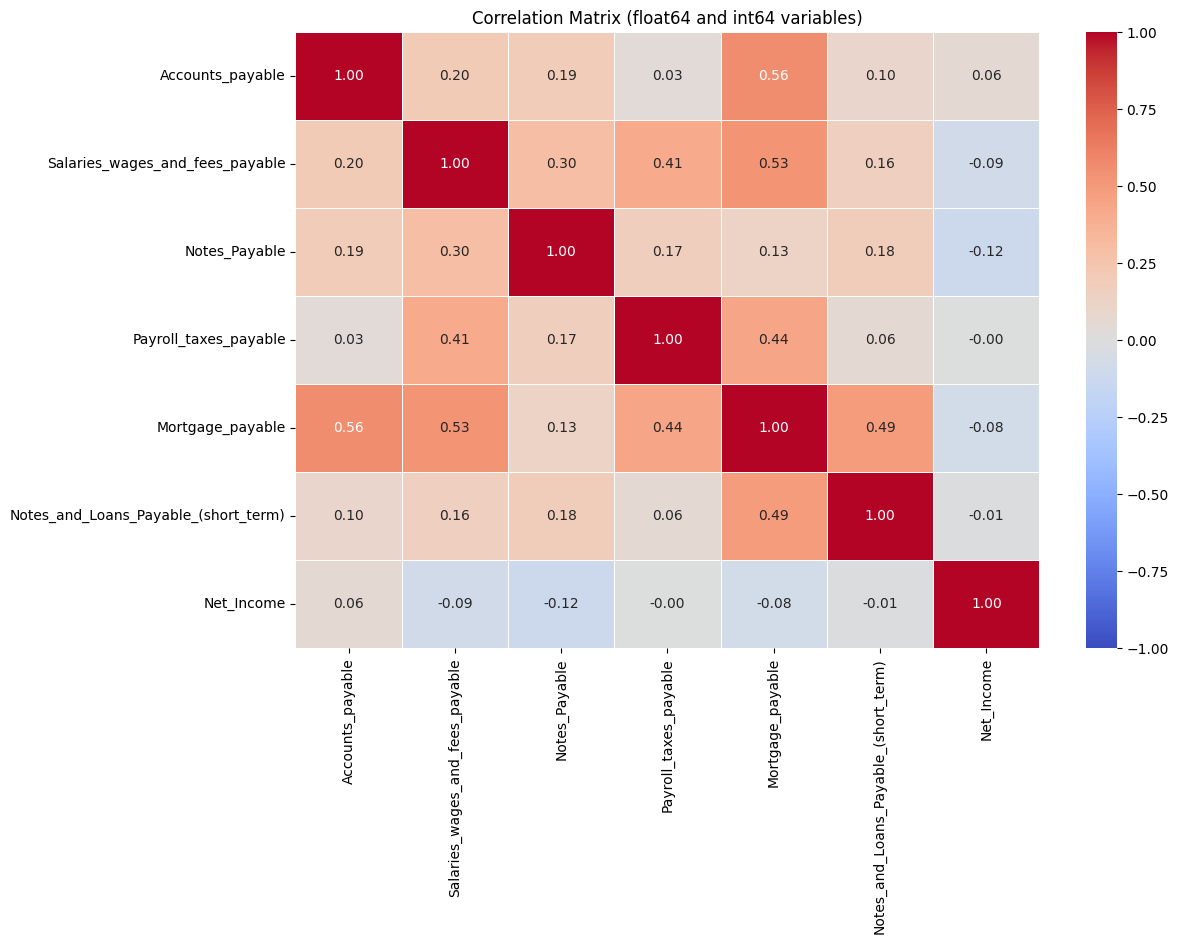

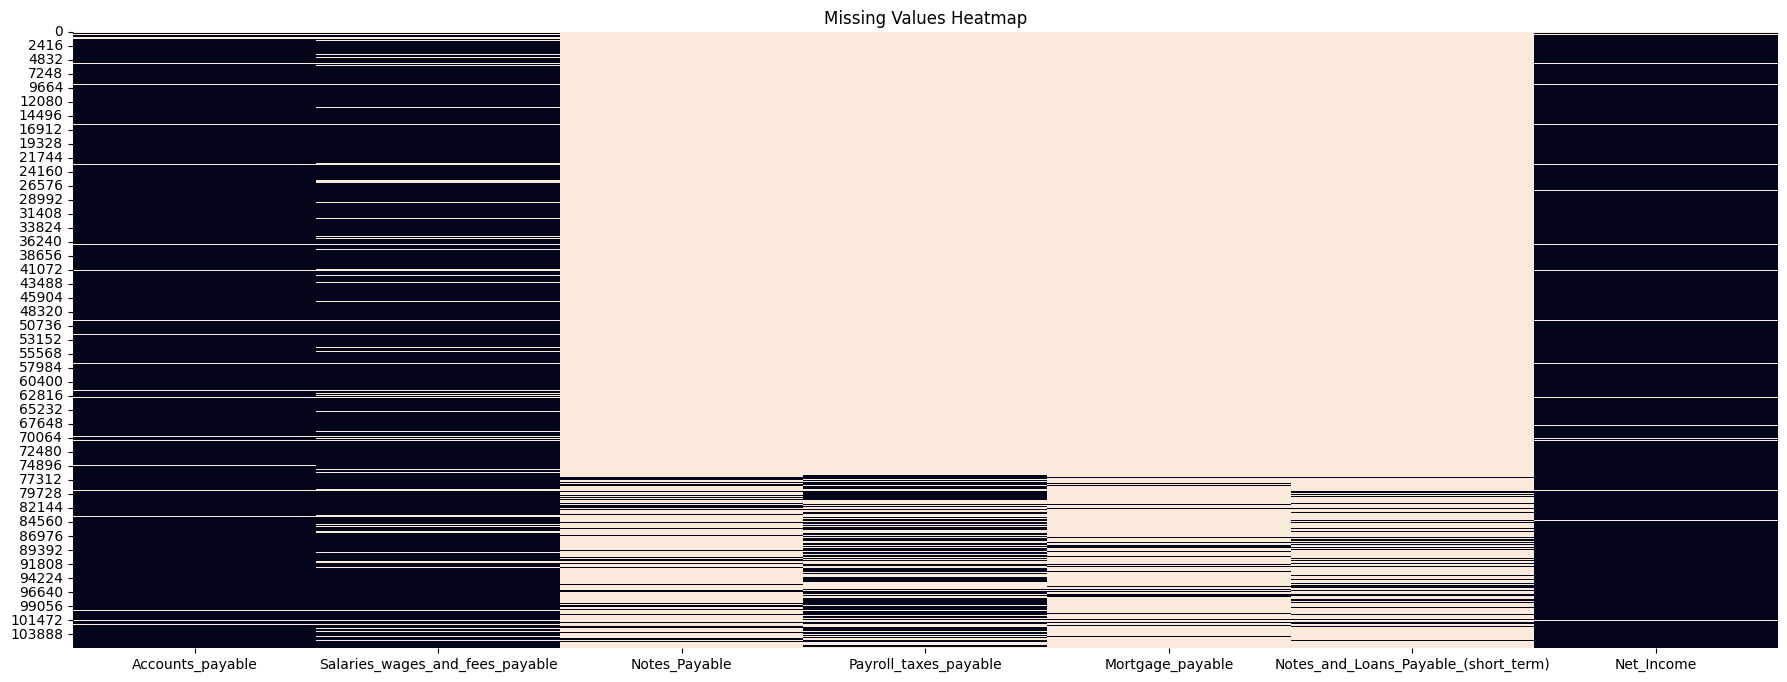

In [14]:
# Select numerical columns (float64 and int64)
num_cols = group.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [15]:
# Calculate percentage of missing values for each column
missing_percentage = group.isnull().mean() * 100

# Get the columns with more than 50% missing values
cols_to_check = missing_percentage[missing_percentage > 50].index

# Compute the correlation matrix for numerical columns
corr_matrix = group.select_dtypes(include=['float64', 'int64']).corr()

# Get the correlation of each column with 'Net_Income', excluding 'Net_Income' itself
correlation_with_net_income = corr_matrix['Net_Income'].drop('Net_Income').sort_values(ascending=False)

# Convert correlations to absolute values to ensure we are comparing magnitudes, not the direction
absolute_corr_with_net_income = correlation_with_net_income.abs()

# Identify the column with the highest absolute correlation
max_corr = absolute_corr_with_net_income.max()

# Identify columns to drop (those with less correlation than the maximum correlation)
columns_to_drop = []
for col in cols_to_check:
    # Ensure that the column exists in absolute correlation data before comparing
    if col in absolute_corr_with_net_income:
        if absolute_corr_with_net_income[col] < max_corr:  # Drop if its correlation is less than the max
            columns_to_drop.append(col)

# Drop the identified columns from the dataset
df = df.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(f"Columns dropped due to >50% NA and lower absolute correlation with Net_Income: {columns_to_drop}")

# Optionally, display the cleaned dataset
# print(group_cleaned.head())

# Print correlation values for review
print("\nAbsolute Correlation with Net_Income:")
print(absolute_corr_with_net_income)


Columns dropped due to >50% NA and lower absolute correlation with Net_Income: ['Payroll_taxes_payable', 'Mortgage_payable', 'Notes_and_Loans_Payable_(short_term)']

Absolute Correlation with Net_Income:
Accounts_payable                        0.058095
Payroll_taxes_payable                   0.000806
Notes_and_Loans_Payable_(short_term)    0.010681
Mortgage_payable                        0.081361
Salaries_wages_and_fees_payable         0.091322
Notes_Payable                           0.121031
Name: Net_Income, dtype: float64


In [16]:
# Select columns that contain the word 'assets' and also include 'Net_Income'
assets_cols = [col for col in df.columns if 'charges' in col.lower()]
assets_cols.append('Net_Income')  # Add 'Net_Income' to the list

# Create a new DataFrame with only the selected columns
group = df[assets_cols]

# Display the selected columns

group.head()

SNF_Discharges_Title_Other  SNF_Discharges_Title_XIX  \
0                         9.0                      35.0   
1                        36.0                       NaN   
2                         3.0                       3.0   
3                        13.0                      13.0   
4                         4.0                      24.0   

   SNF_Discharges_Title_XVIII  SNF_Discharges_Total  \
0                         5.0                  49.0   
1                        23.0                  59.0   
2                         3.0                   9.0   
3                         6.0                  32.0   
4                         NaN                  28.0   

   Total_Discharges_Title_Other  Total_Discharges_Title_XIX  \
0                           9.0                        35.0   
1                          36.0                         NaN   
2                           3.0                         3.0   
3                          13.0                        13.0   
4                           4.0                        24.0   

   Total_Discharges_Title_XVIII  Total_Discharges_Total  Total_Charges  \
0                           5.0                    49.0            NaN   
1                          23.0                    59.0            NaN   
2                           3.0                     9.0            NaN   
3                           6.0                    32.0            NaN   
4                           NaN                    28.0            NaN   

   Net_Income  
0    311430.0  
1   -588469.0  
2    -47859.0  
3    -63638.0  
4     -1613.0

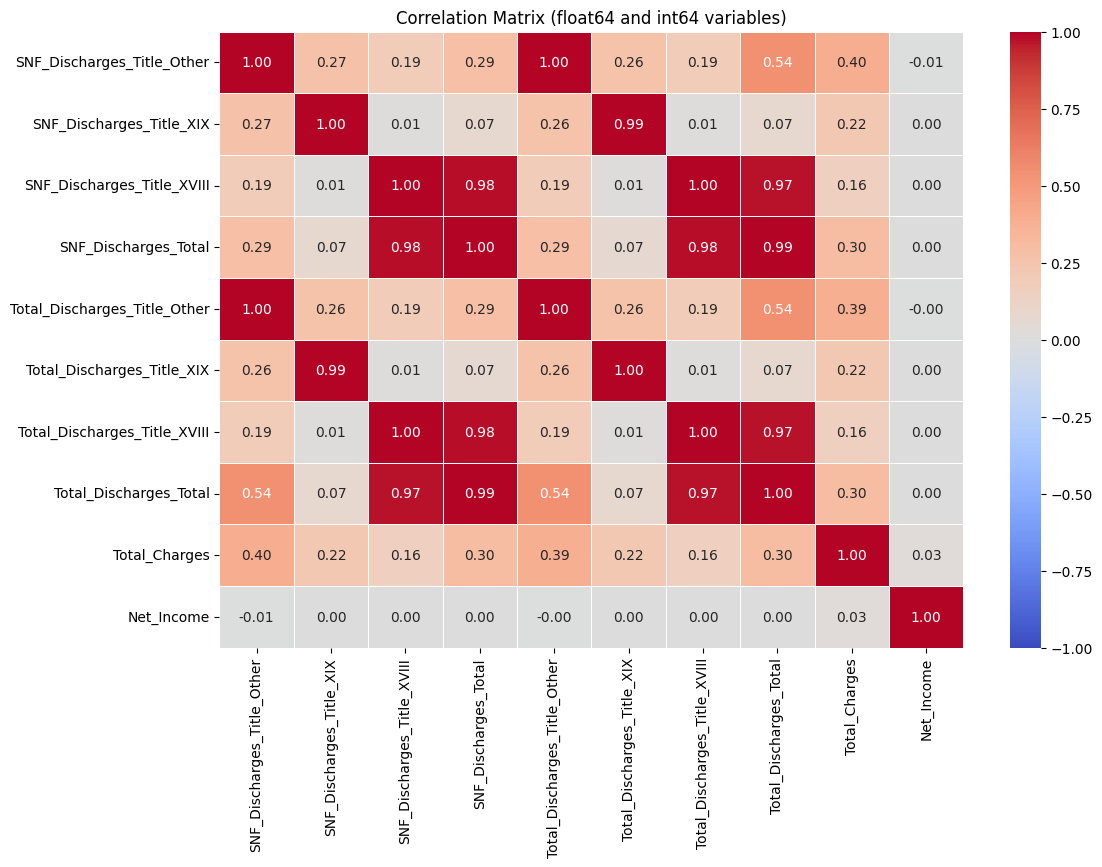

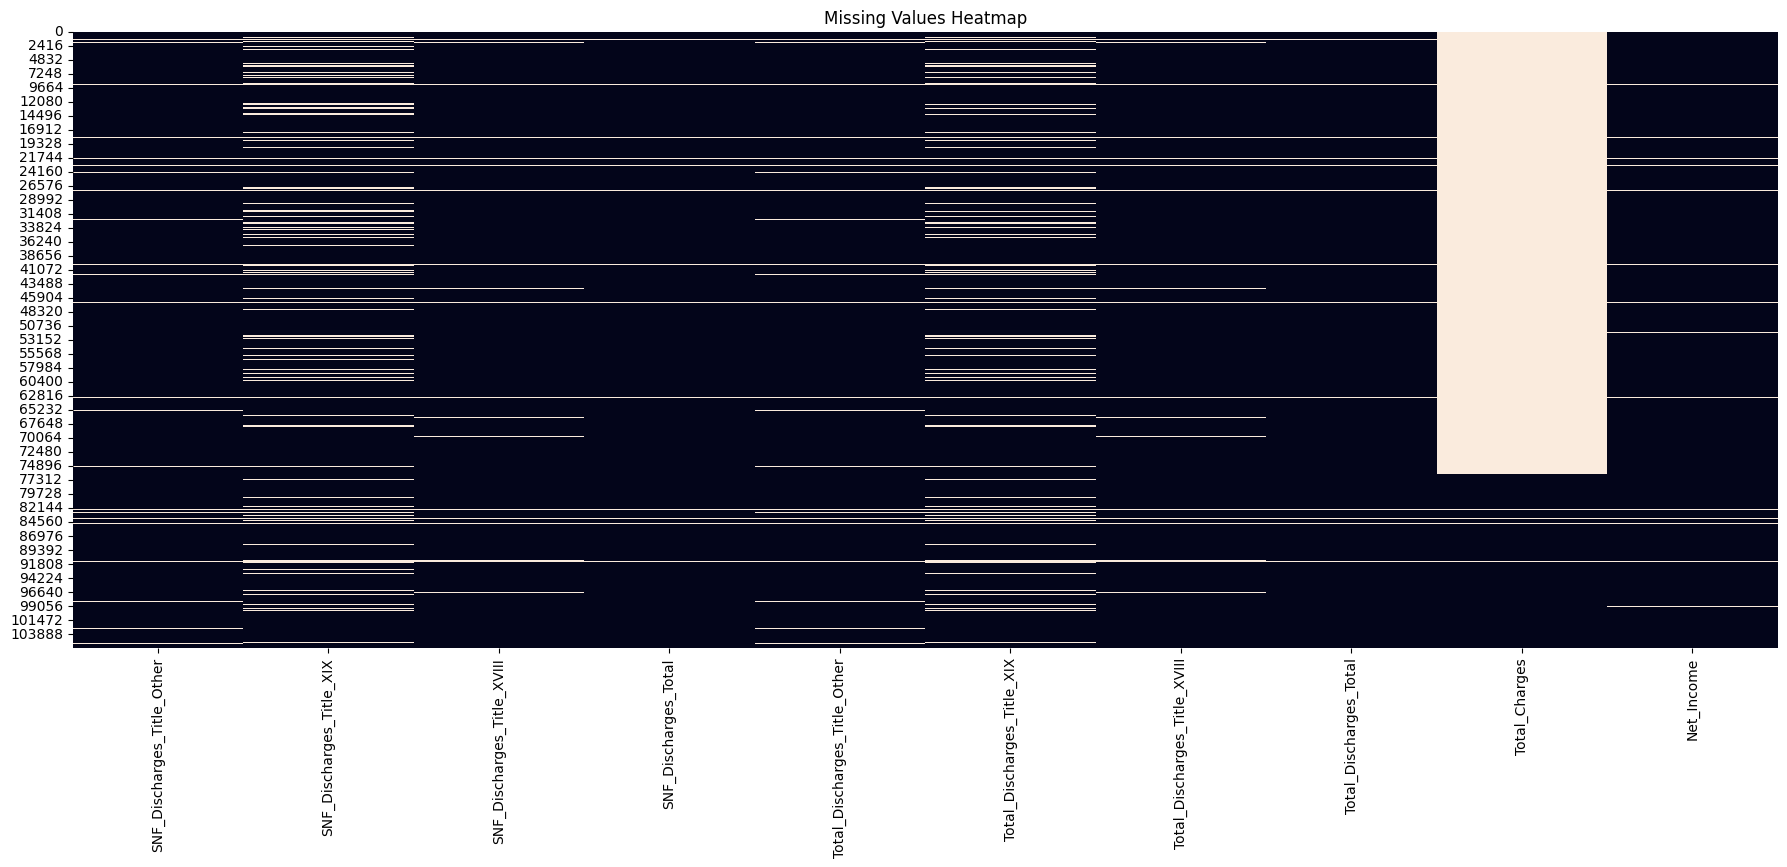

In [17]:
# Select numerical columns (float64 and int64)
num_cols = group.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [18]:
# Calculate percentage of missing values for each column
missing_percentage = group.isnull().mean() * 100

# Get the columns with more than 50% missing values
cols_to_check = missing_percentage[missing_percentage > 50].index

# Compute the correlation matrix for numerical columns
corr_matrix = group.select_dtypes(include=['float64', 'int64']).corr()

# Get the correlation of each column with 'Net_Income', excluding 'Net_Income' itself
correlation_with_net_income = corr_matrix['Net_Income'].drop('Net_Income').sort_values(ascending=False)

# Convert correlations to absolute values to ensure we are comparing magnitudes, not the direction
absolute_corr_with_net_income = correlation_with_net_income.abs()

# Identify columns to drop
columns_to_drop = []
better_correlated_vars = []  # To store variables with better correlation

for col in cols_to_check:
    # Ensure that the column exists in absolute correlation data before comparing
    if col in absolute_corr_with_net_income:
        # Check if its absolute correlation with Net_Income is less than the highest absolute correlation
        if absolute_corr_with_net_income[col] < absolute_corr_with_net_income.iloc[0]:  # Compare with the highest correlation
            columns_to_drop.append(col)
            # List columns that have a better absolute correlation with Net_Income
            better_correlated_vars.extend(absolute_corr_with_net_income[absolute_corr_with_net_income > absolute_corr_with_net_income[col]].index)

# Drop the identified columns from the dataset
group_cleaned = group.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(f"Columns dropped due to >50% NA and lower absolute correlation with Net_Income: {columns_to_drop}")

# List the variables that have a better correlation with Net_Income than the dropped ones
print("\nVariables with better absolute correlation with Net_Income:")
better_correlated_vars = list(set(better_correlated_vars))  # Remove duplicates
print(better_correlated_vars)

# Optionally, display the cleaned dataset
# print(group_cleaned.head())

# Print correlation values for review
print("\nAbsolute Correlation with Net_Income:")
print(absolute_corr_with_net_income)


Columns dropped due to >50% NA and lower absolute correlation with Net_Income: []

Variables with better absolute correlation with Net_Income:
[]

Absolute Correlation with Net_Income:
Total_Charges                   0.026170
SNF_Discharges_Title_XIX        0.002130
Total_Discharges_Title_XIX      0.001652
Total_Discharges_Title_XVIII    0.001311
SNF_Discharges_Title_XVIII      0.001311
Total_Discharges_Total          0.000858
SNF_Discharges_Total            0.000740
Total_Discharges_Title_Other    0.004891
SNF_Discharges_Title_Other      0.005071
Name: Net_Income, dtype: float64


In [19]:
# Select columns that contain the word 'assets' and also include 'Net_Income'
assets_cols = [col for col in df.columns if 'labor' in col.lower()]
assets_cols.append('Net_Income')  # Add 'Net_Income' to the list

# Create a new DataFrame with only the selected columns
group = df[assets_cols]

# Display the selected columns

group.head()

Contract_Labor  Net_Income
0             NaN    311430.0
1             NaN   -588469.0
2             NaN    -47859.0
3             NaN    -63638.0
4             NaN     -1613.0

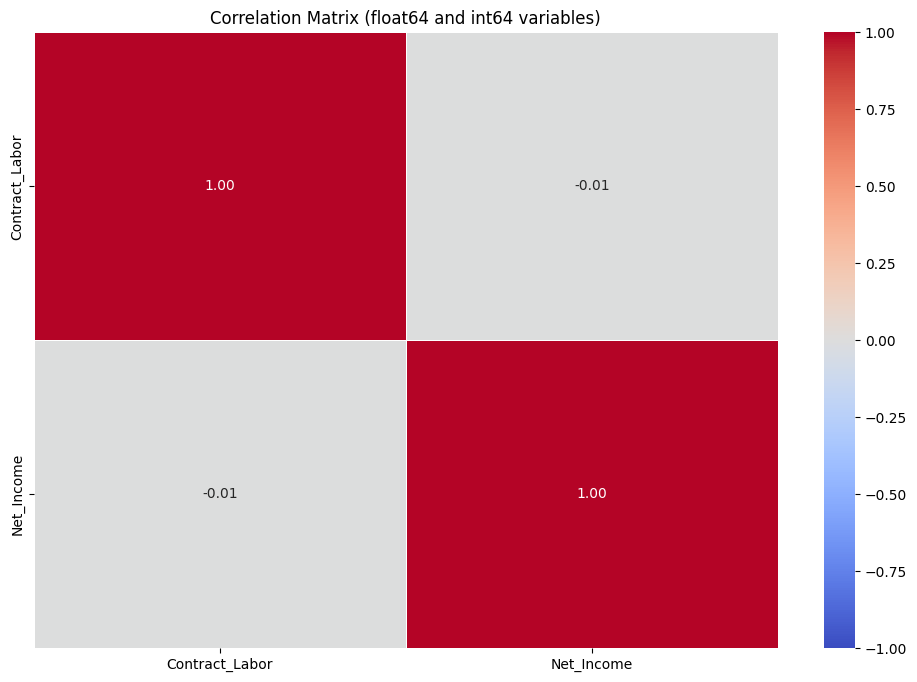

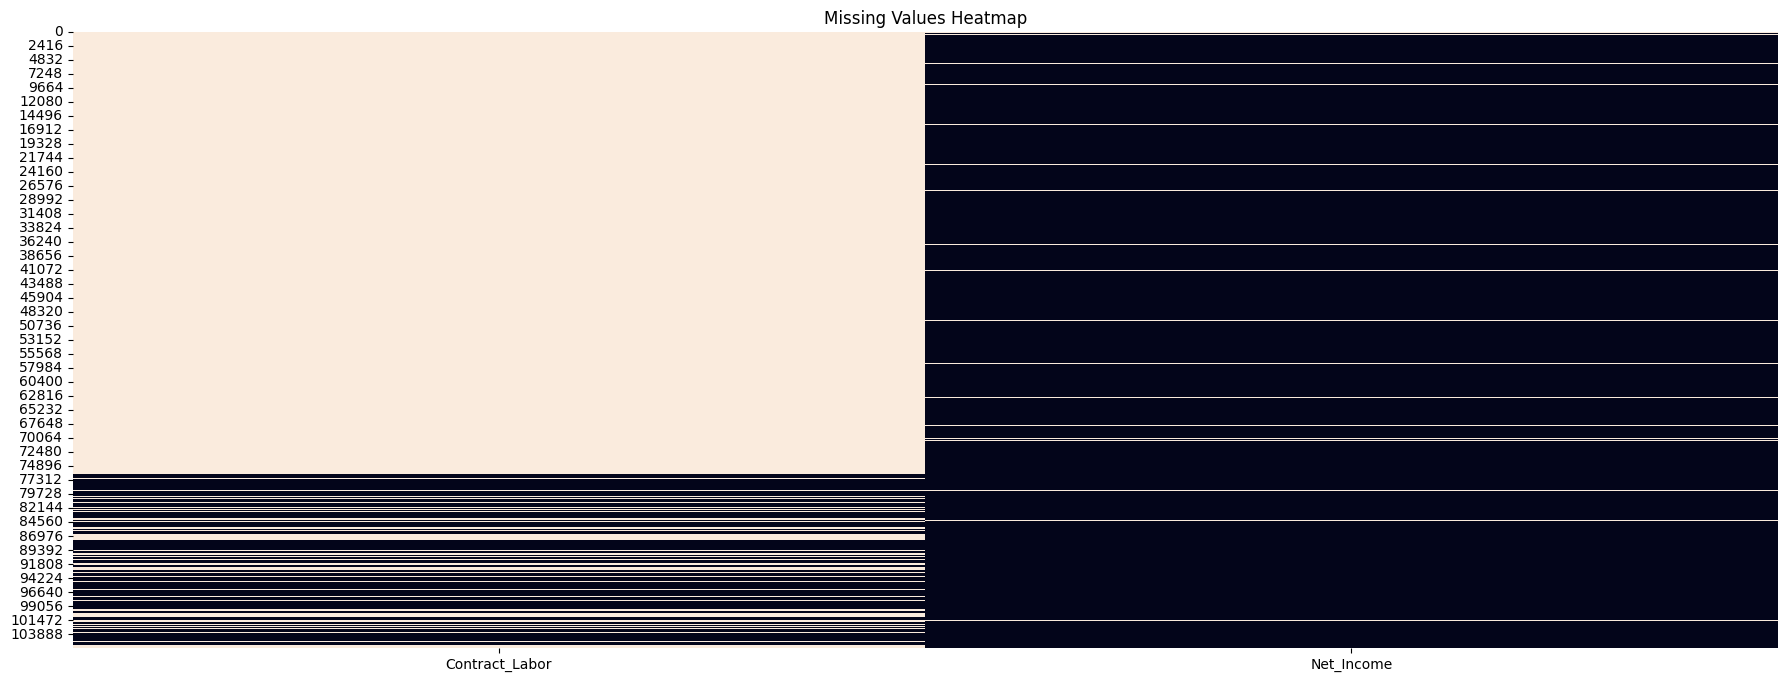

In [20]:
# Select numerical columns (float64 and int64)
num_cols = group.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [21]:
# Drop a specific column by name
df = df.drop(columns=['Contract_Labor'])


In [22]:
# Select columns that contain the word 'assets' and also include 'Net_Income'
assets_cols = [col for col in df.columns if 'notes' in col.lower()]
assets_cols.append('Net_Income')  # Add 'Net_Income' to the list

# Create a new DataFrame with only the selected columns
group = df[assets_cols]

# Display the selected columns

group.head()

Less:_Allowances_for_uncollectible_notes_and_accounts_receivable  \
0                                                NaN                  
1                                                NaN                  
2                                                NaN                  
3                                                NaN                  
4                                                NaN                  

   Notes_Payable  Net_Income  
0            NaN    311430.0  
1            NaN   -588469.0  
2            NaN    -47859.0  
3            NaN    -63638.0  
4            NaN     -1613.0

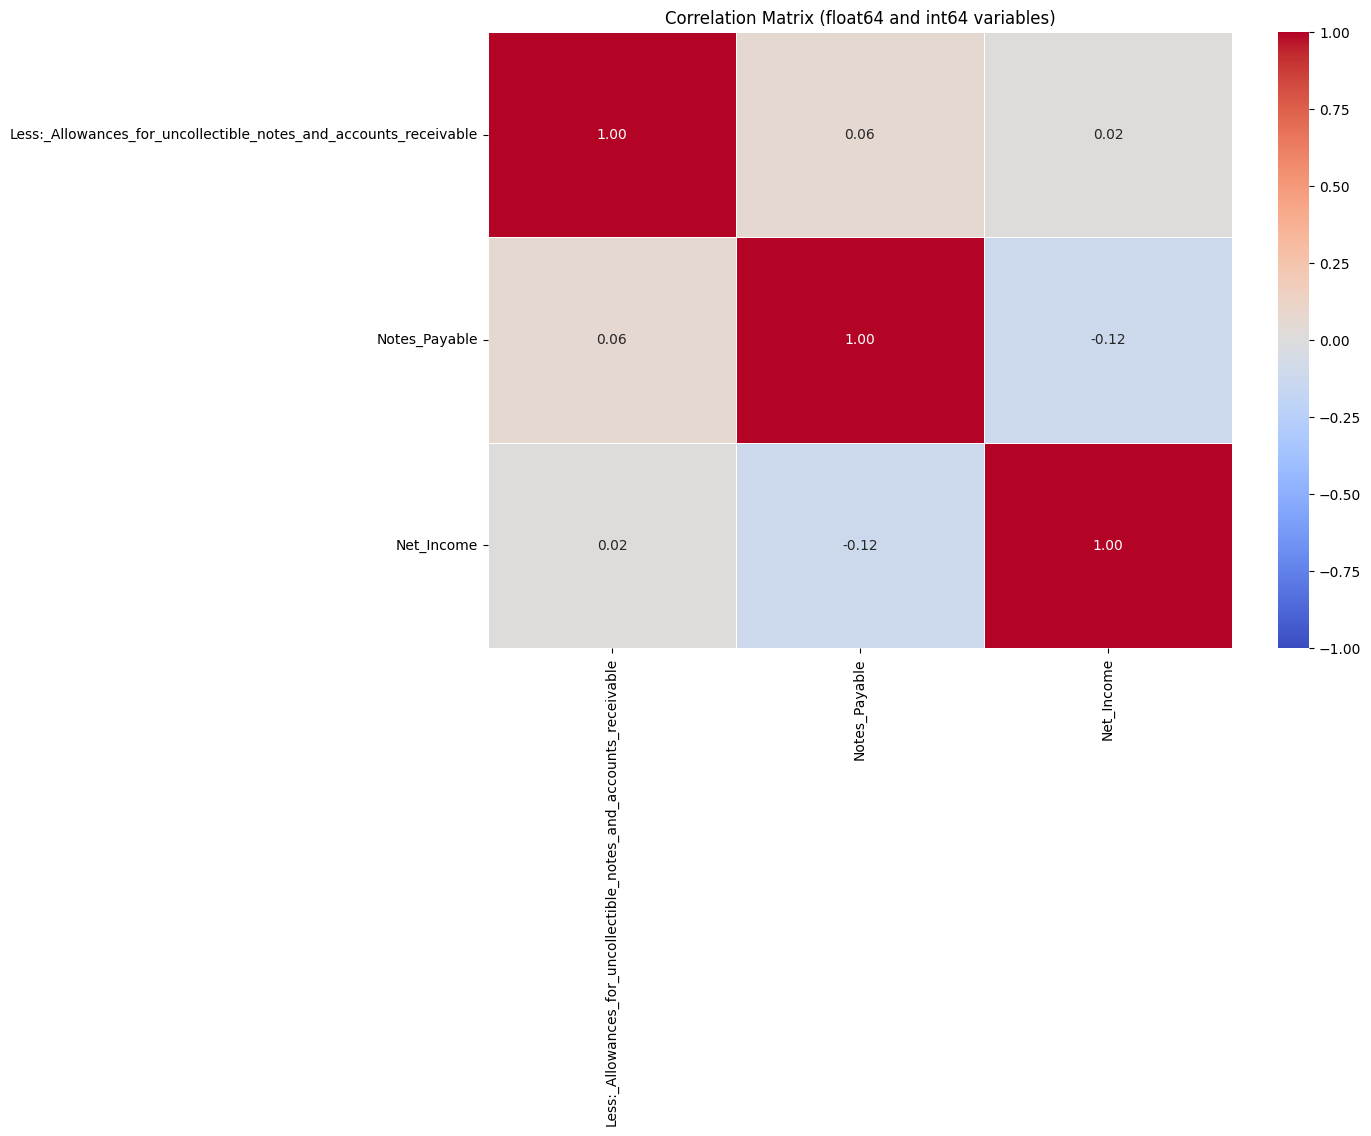

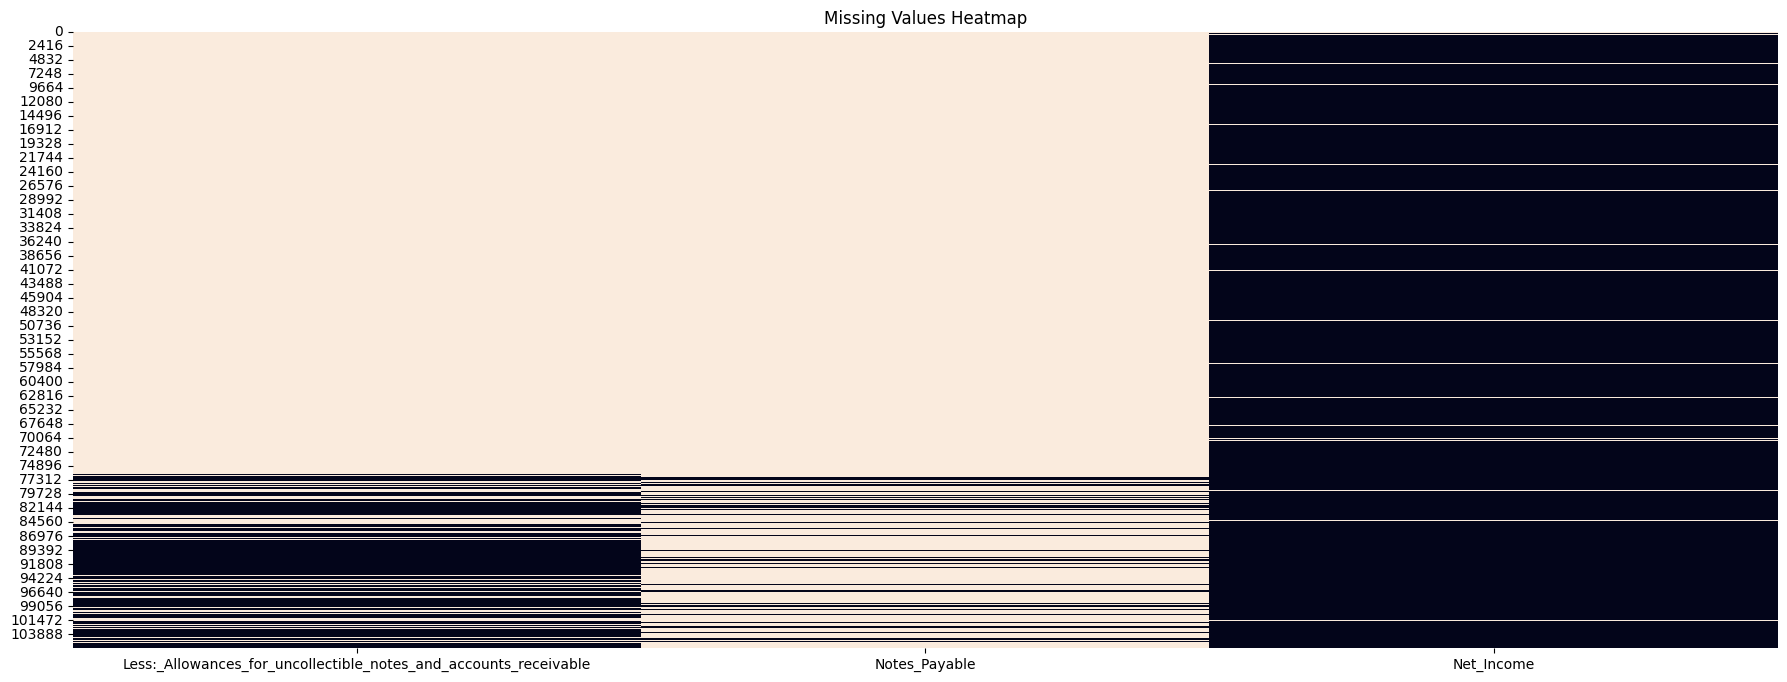

In [23]:
# Select numerical columns (float64 and int64)
num_cols = group.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [24]:
# Calculate percentage of missing values for each column
missing_percentage = group.isnull().mean() * 100

# Get the columns with more than 50% missing values
cols_to_check = missing_percentage[missing_percentage > 50].index

# Compute the correlation matrix for numerical columns
corr_matrix = group.select_dtypes(include=['float64', 'int64']).corr()

# Get the correlation of each column with 'Net_Income', excluding 'Net_Income' itself
correlation_with_net_income = corr_matrix['Net_Income'].drop('Net_Income').sort_values(ascending=False)

# Convert correlations to absolute values to ensure we are comparing magnitudes, not the direction
absolute_corr_with_net_income = correlation_with_net_income.abs()

# Identify the column with the highest absolute correlation
max_corr = absolute_corr_with_net_income.max()

# Identify columns to drop (those with less correlation than the maximum correlation)
columns_to_drop = []
for col in cols_to_check:
    # Ensure that the column exists in absolute correlation data before comparing
    if col in absolute_corr_with_net_income:
        if absolute_corr_with_net_income[col] < max_corr:  # Drop if its correlation is less than the max
            columns_to_drop.append(col)

# Drop the identified columns from the dataset
df = df.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(f"Columns dropped due to >50% NA and lower absolute correlation with Net_Income: {columns_to_drop}")

# Optionally, display the cleaned dataset
# print(group_cleaned.head())

# Print correlation values for review
print("\nAbsolute Correlation with Net_Income:")
print(absolute_corr_with_net_income)


Columns dropped due to >50% NA and lower absolute correlation with Net_Income: ['Less:_Allowances_for_uncollectible_notes_and_accounts_receivable']

Absolute Correlation with Net_Income:
Less:_Allowances_for_uncollectible_notes_and_accounts_receivable    0.015206
Notes_Payable                                                       0.121031
Name: Net_Income, dtype: float64


In [25]:
# Select columns that contain the words 'land' or 'liabilities' and also include 'Net_Income'
selected_words = ['land', 'assets']
selected_cols = [col for col in df.columns if any(word in col.lower() for word in selected_words)]
selected_cols.append('Net_Income')  # Add 'Net_Income' to the list

# Create a new DataFrame with only the selected columns
group = df[selected_cols]

# Display the selected columns
group.head()


Other_Assets  Total_Assets  Total_fixed_Assets  Total_other_Assets  \
0           NaN      765020.0             55061.0           -729268.0   
1       36000.0     1687456.0            671306.0             36000.0   
2           NaN      244239.0                 NaN                 NaN   
3           NaN     1830758.0             26949.0             74985.0   
4           NaN      807209.0                 NaN                 NaN   

   Land_improvements  Other_current_assets  Total_Current_Assets Land  \
0                NaN                   NaN             1439227.0  NaN   
1                NaN                   NaN              980150.0  NaN   
2                NaN                   NaN              244239.0  NaN   
3                NaN                   NaN             1728824.0  NaN   
4                NaN                   NaN              807209.0  NaN   

   Net_Income  
0    311430.0  
1   -588469.0  
2    -47859.0  
3    -63638.0  
4     -1613.0

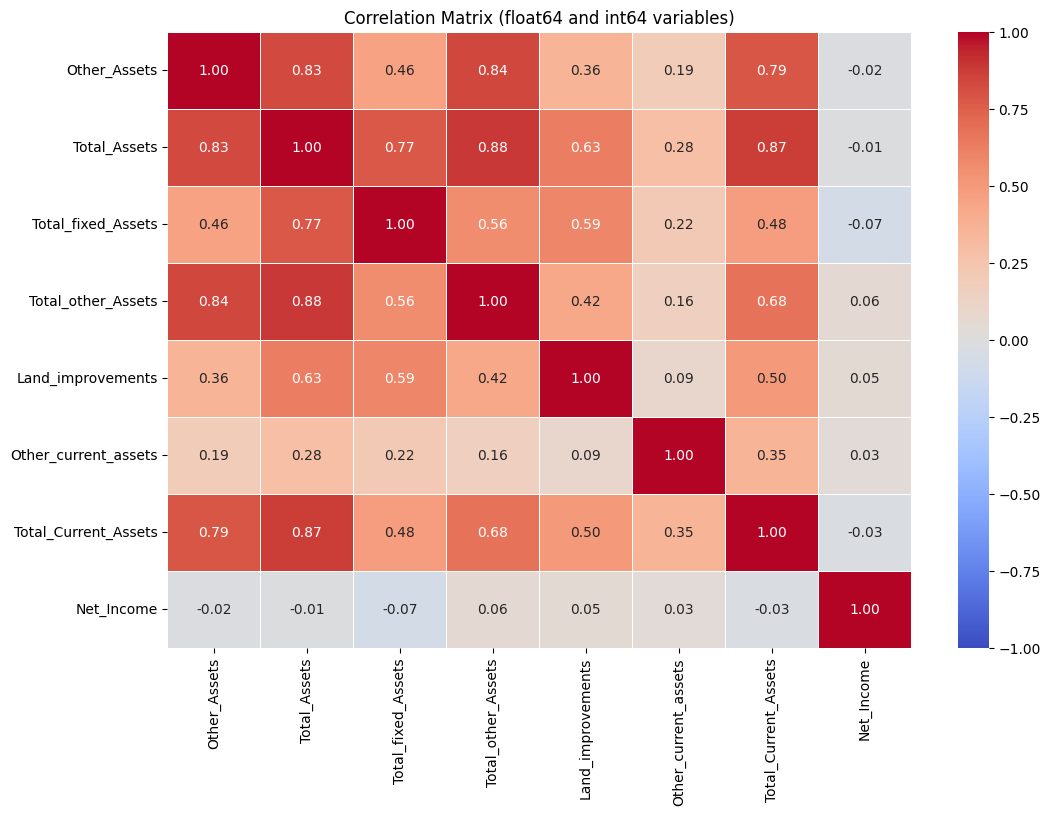

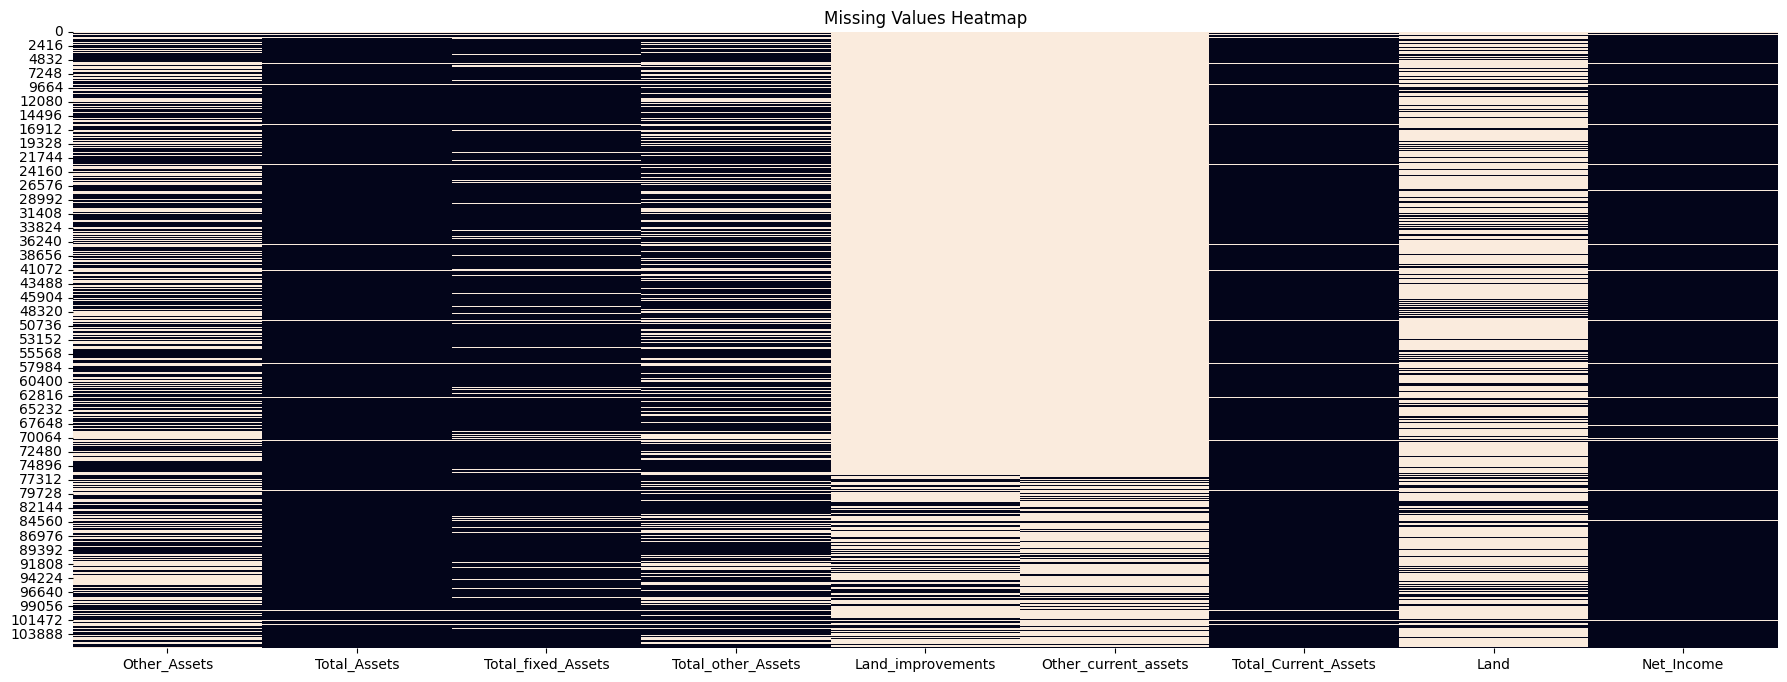

In [26]:
# Select numerical columns (float64 and int64)
num_cols = group.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [27]:
# Calculate percentage of missing values for each column
missing_percentage = group.isnull().mean() * 100

# Get the columns with more than 50% missing values
cols_to_check = missing_percentage[missing_percentage > 50].index

# Compute the correlation matrix for numerical columns
corr_matrix = group.select_dtypes(include=['float64', 'int64']).corr()

# Get the correlation of each column with 'Net_Income', excluding 'Net_Income' itself
correlation_with_net_income = corr_matrix['Net_Income'].drop('Net_Income').sort_values(ascending=False)

# Convert correlations to absolute values to ensure we are comparing magnitudes, not the direction
absolute_corr_with_net_income = correlation_with_net_income.abs()

# Identify the column with the highest absolute correlation
max_corr = absolute_corr_with_net_income.max()

# Identify columns to drop (those with less correlation than the maximum correlation)
columns_to_drop = []
for col in cols_to_check:
    # Ensure that the column exists in absolute correlation data before comparing
    if col in absolute_corr_with_net_income:
        if absolute_corr_with_net_income[col] < max_corr:  # Drop if its correlation is less than the max
            columns_to_drop.append(col)

# Drop the identified columns from the dataset
df = df.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(f"Columns dropped due to >50% NA and lower absolute correlation with Net_Income: {columns_to_drop}")

# Optionally, display the cleaned dataset
# print(group_cleaned.head())

# Print correlation values for review
print("\nAbsolute Correlation with Net_Income:")
print(absolute_corr_with_net_income)

Columns dropped due to >50% NA and lower absolute correlation with Net_Income: ['Land_improvements', 'Other_current_assets']

Absolute Correlation with Net_Income:
Total_other_Assets      0.058940
Land_improvements       0.047184
Other_current_assets    0.032717
Total_Assets            0.013971
Other_Assets            0.022875
Total_Current_Assets    0.025012
Total_fixed_Assets      0.072134
Name: Net_Income, dtype: float64


In [28]:
# Select columns that contain the words 'land' or 'liabilities' and also include 'Net_Income'
selected_words = ['inventory', 'assets']
selected_cols = [col for col in df.columns if any(word in col.lower() for word in selected_words)]
selected_cols.append('Net_Income')  # Add 'Net_Income' to the list

# Create a new DataFrame with only the selected columns
group = df[selected_cols]

# Display the selected columns
group.head()


Other_Assets  Total_Assets  Total_fixed_Assets  Total_other_Assets  \
0           NaN      765020.0             55061.0           -729268.0   
1       36000.0     1687456.0            671306.0             36000.0   
2           NaN      244239.0                 NaN                 NaN   
3           NaN     1830758.0             26949.0             74985.0   
4           NaN      807209.0                 NaN                 NaN   

   Total_Current_Assets  Inventory  Net_Income  
0             1439227.0        NaN    311430.0  
1              980150.0        NaN   -588469.0  
2              244239.0        NaN    -47859.0  
3             1728824.0        NaN    -63638.0  
4              807209.0        NaN     -1613.0

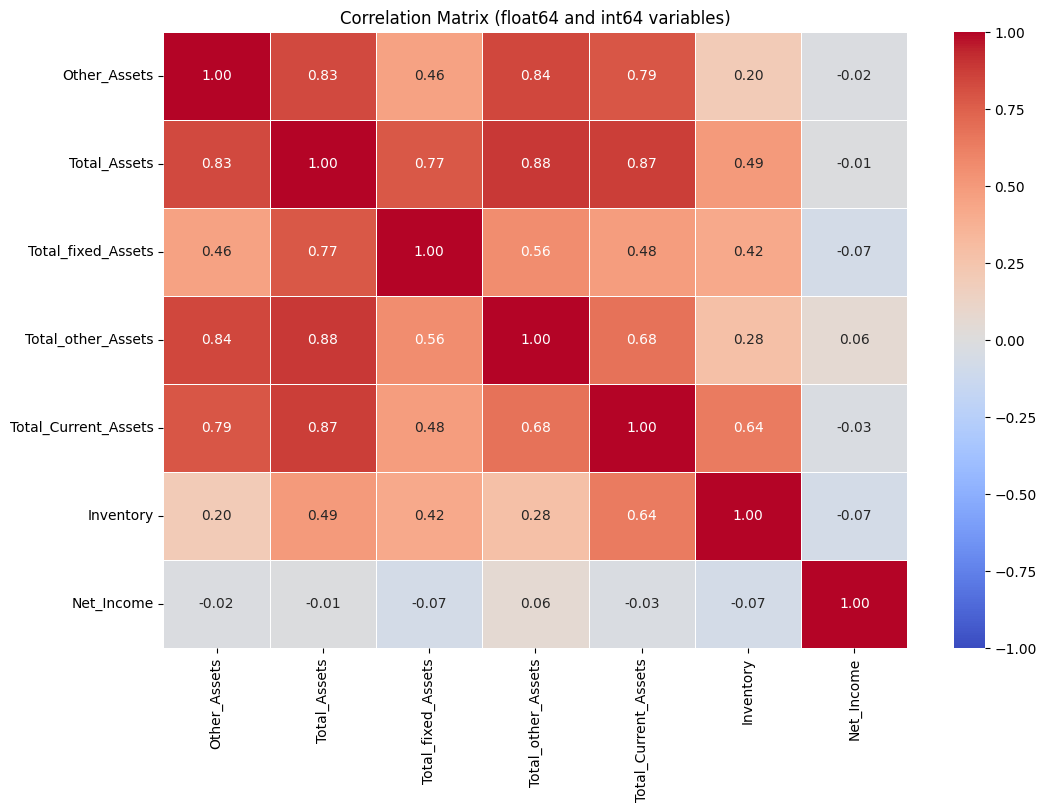

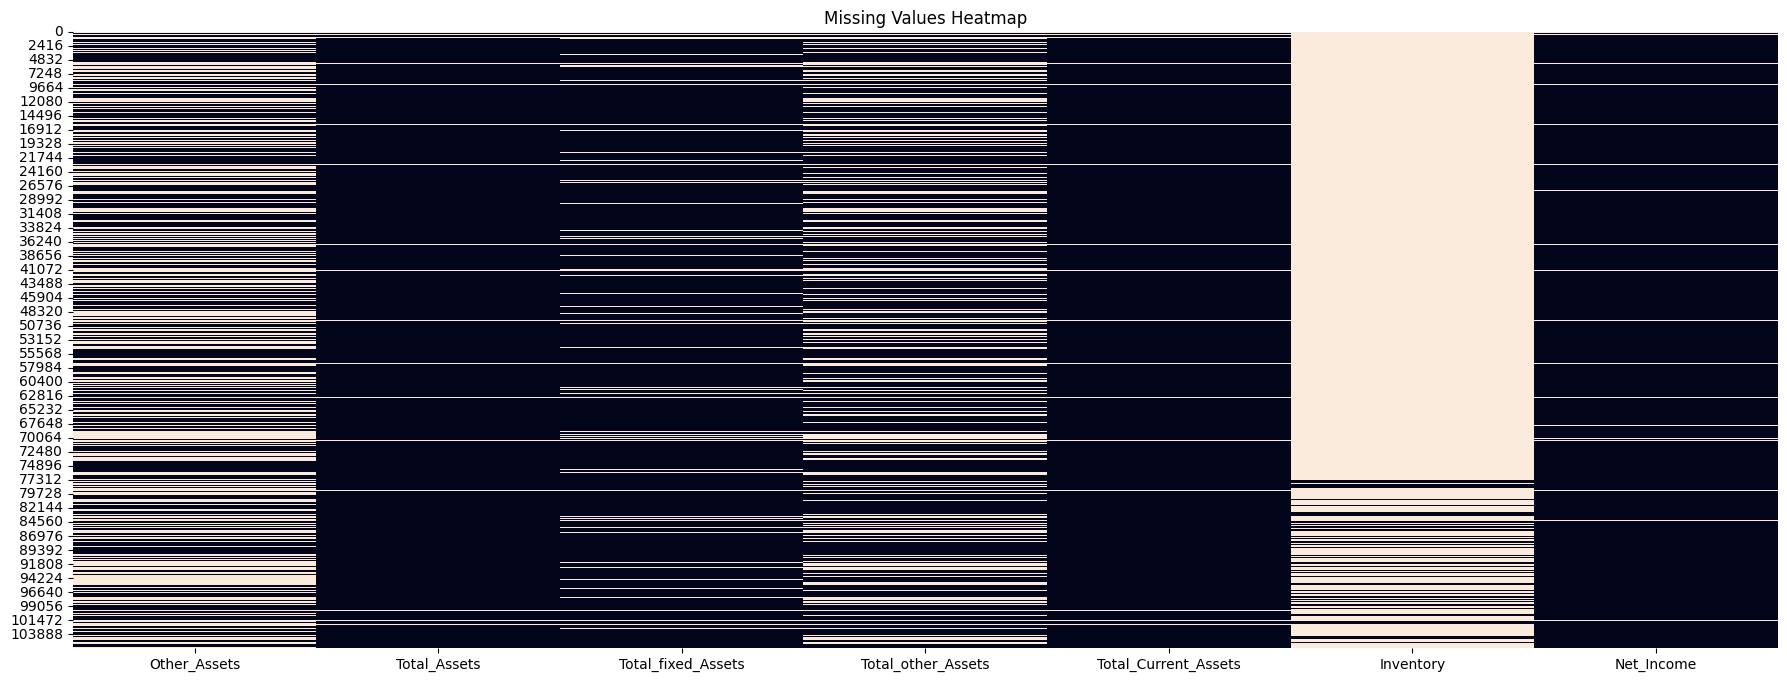

In [29]:
# Select numerical columns (float64 and int64)
num_cols = group.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [30]:
# Calculate percentage of missing values for each column
missing_percentage = group.isnull().mean() * 100

# Get the columns with more than 50% missing values
cols_to_check = missing_percentage[missing_percentage > 50].index

# Compute the correlation matrix for numerical columns
corr_matrix = group.select_dtypes(include=['float64', 'int64']).corr()

# Get the correlation of each column with 'Net_Income', excluding 'Net_Income' itself
correlation_with_net_income = corr_matrix['Net_Income'].drop('Net_Income').sort_values(ascending=False)

# Convert correlations to absolute values to ensure we are comparing magnitudes, not the direction
absolute_corr_with_net_income = correlation_with_net_income.abs()

# Identify the column with the highest absolute correlation
max_corr = absolute_corr_with_net_income.max()

# Identify columns to drop (those with less correlation than the maximum correlation)
columns_to_drop = []
for col in cols_to_check:
    # Ensure that the column exists in absolute correlation data before comparing
    if col in absolute_corr_with_net_income:
        if absolute_corr_with_net_income[col] < max_corr:  # Drop if its correlation is less than the max
            columns_to_drop.append(col)

# Drop the identified columns from the dataset
df = df.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(f"Columns dropped due to >50% NA and lower absolute correlation with Net_Income: {columns_to_drop}")

# Optionally, display the cleaned dataset
# print(group_cleaned.head())

# Print correlation values for review
print("\nAbsolute Correlation with Net_Income:")
print(absolute_corr_with_net_income)

Columns dropped due to >50% NA and lower absolute correlation with Net_Income: ['Inventory']

Absolute Correlation with Net_Income:
Total_other_Assets      0.058940
Total_Assets            0.013971
Other_Assets            0.022875
Total_Current_Assets    0.025012
Inventory               0.070864
Total_fixed_Assets      0.072134
Name: Net_Income, dtype: float64


In [31]:
# Select columns that contain the words 'land' or 'liabilities' and also include 'Net_Income'
selected_words = ['investments', 'assets', 'lease']
selected_cols = [col for col in df.columns if any(word in col.lower() for word in selected_words)]
selected_cols.append('Net_Income')  # Add 'Net_Income' to the list

# Create a new DataFrame with only the selected columns
group = df[selected_cols]

# Display the selected columns
group.head()


Other_Assets  Total_Assets  Total_fixed_Assets  Total_other_Assets  \
0           NaN      765020.0             55061.0           -729268.0   
1       36000.0     1687456.0            671306.0             36000.0   
2           NaN      244239.0                 NaN                 NaN   
3           NaN     1830758.0             26949.0             74985.0   
4           NaN      807209.0                 NaN                 NaN   

   Investments  Total_Current_Assets  Leasehold_improvements  Net_Income  
0          NaN             1439227.0                     NaN    311430.0  
1          NaN              980150.0                     NaN   -588469.0  
2          NaN              244239.0                     NaN    -47859.0  
3          NaN             1728824.0                     NaN    -63638.0  
4          NaN              807209.0                     NaN     -1613.0

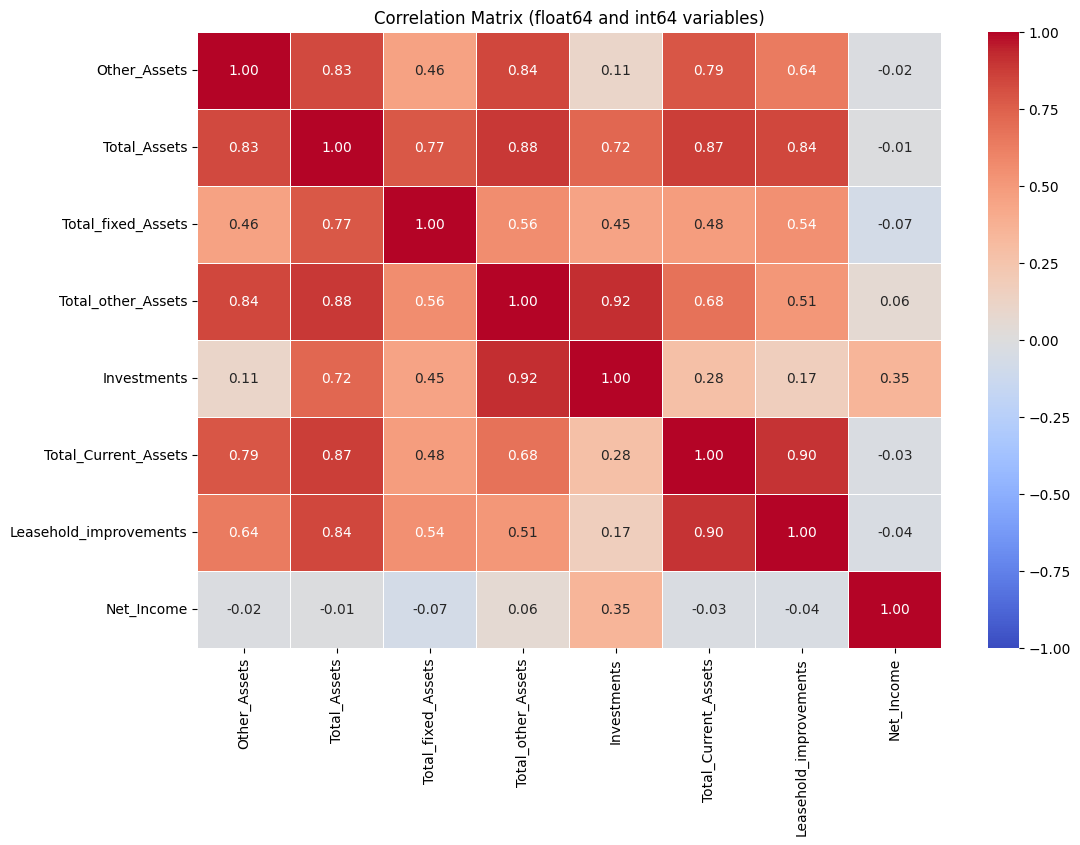

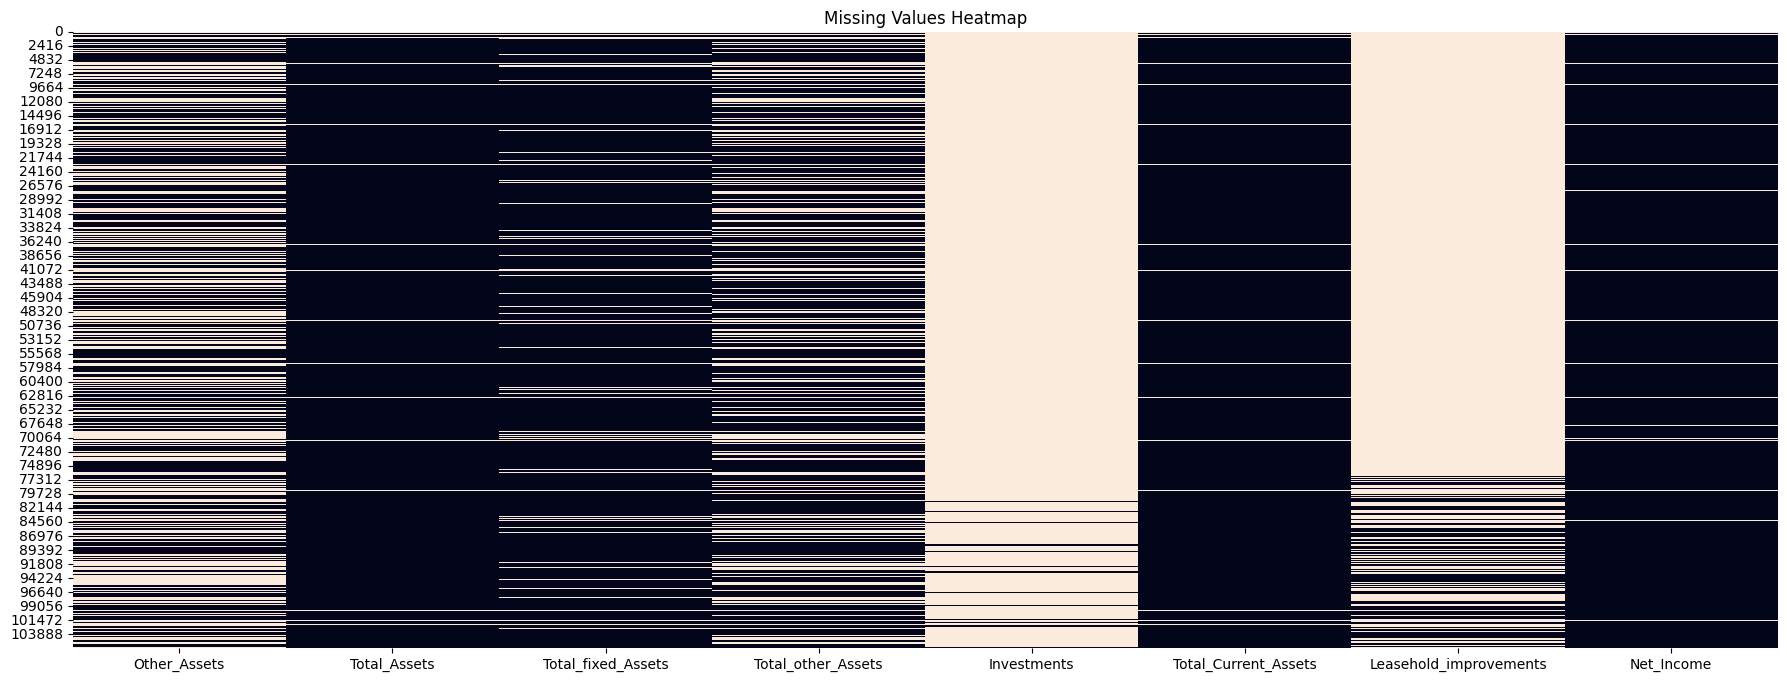

In [32]:
# Select numerical columns (float64 and int64)
num_cols = group.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [33]:
# Calculate percentage of missing values for each column
missing_percentage = group.isnull().mean() * 100

# Get the columns with more than 50% missing values
cols_to_check = missing_percentage[missing_percentage > 50].index

# Compute the correlation matrix for numerical columns
corr_matrix = group.select_dtypes(include=['float64', 'int64']).corr()

# Get the correlation of each column with 'Net_Income', excluding 'Net_Income' itself
correlation_with_net_income = corr_matrix['Net_Income'].drop('Net_Income').sort_values(ascending=False)

# Convert correlations to absolute values to ensure we are comparing magnitudes, not the direction
absolute_corr_with_net_income = correlation_with_net_income.abs()

# Identify the column with the highest absolute correlation
max_corr = absolute_corr_with_net_income.max()

# Identify columns to drop (those with less correlation than the maximum correlation)
columns_to_drop = []
for col in cols_to_check:
    # Ensure that the column exists in absolute correlation data before comparing
    if col in absolute_corr_with_net_income:
        if absolute_corr_with_net_income[col] < max_corr:  # Drop if its correlation is less than the max
            columns_to_drop.append(col)

# Drop the identified columns from the dataset
df = df.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(f"Columns dropped due to >50% NA and lower absolute correlation with Net_Income: {columns_to_drop}")

# Optionally, display the cleaned dataset
# print(group_cleaned.head())

# Print correlation values for review
print("\nAbsolute Correlation with Net_Income:")
print(absolute_corr_with_net_income)

Columns dropped due to >50% NA and lower absolute correlation with Net_Income: ['Leasehold_improvements']

Absolute Correlation with Net_Income:
Investments               0.351033
Total_other_Assets        0.058940
Total_Assets              0.013971
Other_Assets              0.022875
Total_Current_Assets      0.025012
Leasehold_improvements    0.036853
Total_fixed_Assets        0.072134
Name: Net_Income, dtype: float64


In [34]:
# Select columns that contain the words 'land' or 'liabilities' and also include 'Net_Income'
selected_words = ['accounts', 'debts', 'assets']
selected_cols = [col for col in df.columns if any(word in col.lower() for word in selected_words)]
selected_cols.append('Net_Income')  # Add 'Net_Income' to the list

# Create a new DataFrame with only the selected columns
group = df[selected_cols]

# Display the selected columns
group.head()


Accounts_Receivable  Accounts_payable  Other_Assets  Total_Assets  \
0            1366877.0          292277.0           NaN      765020.0   
1            1326379.0               NaN       36000.0     1687456.0   
2             135859.0           79894.0           NaN      244239.0   
3            1222903.0          537451.0           NaN     1830758.0   
4             634347.0          253637.0           NaN      807209.0   

   Total_fixed_Assets  Total_other_Assets  Allowable_Bad_Debts  \
0             55061.0           -729268.0                  NaN   
1            671306.0             36000.0                  NaN   
2                 NaN                 NaN                  NaN   
3             26949.0             74985.0                  NaN   
4                 NaN                 NaN                  NaN   

   Total_Current_Assets  Net_Income  
0             1439227.0    311430.0  
1              980150.0   -588469.0  
2              244239.0    -47859.0  
3             1728824.0    -63638.0  
4              807209.0     -1613.0

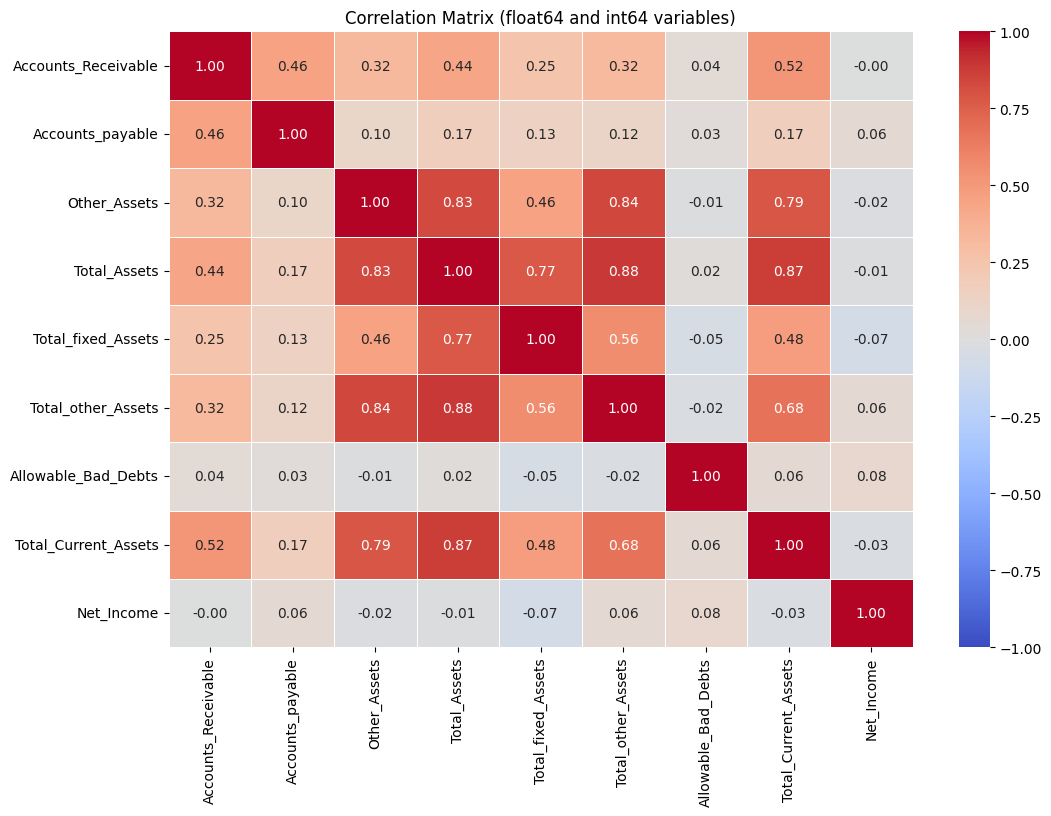

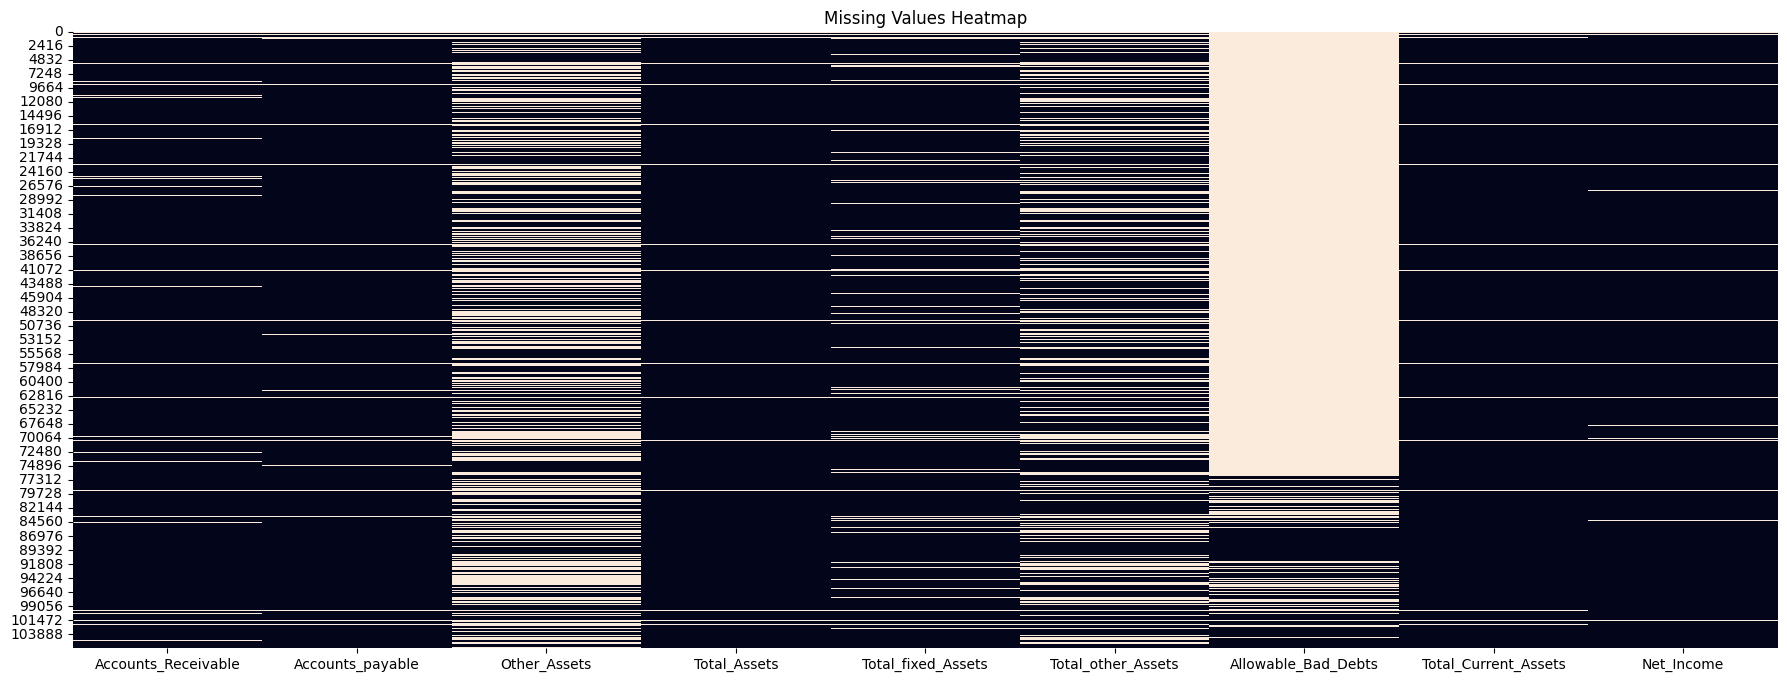

In [35]:
# Select numerical columns (float64 and int64)
num_cols = group.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [36]:
# Calculate percentage of missing values for each column
missing_percentage = group.isnull().mean() * 100

# Get the columns with more than 50% missing values
cols_to_check = missing_percentage[missing_percentage > 50].index

# Compute the correlation matrix for numerical columns
corr_matrix = group.select_dtypes(include=['float64', 'int64']).corr()

# Get the correlation of each column with 'Net_Income', excluding 'Net_Income' itself
correlation_with_net_income = corr_matrix['Net_Income'].drop('Net_Income').sort_values(ascending=False)

# Convert correlations to absolute values to ensure we are comparing magnitudes, not the direction
absolute_corr_with_net_income = correlation_with_net_income.abs()

# Identify the column with the highest absolute correlation
max_corr = absolute_corr_with_net_income.max()

# Identify columns to drop (those with less correlation than the maximum correlation)
columns_to_drop = []
for col in cols_to_check:
    # Ensure that the column exists in absolute correlation data before comparing
    if col in absolute_corr_with_net_income:
        if absolute_corr_with_net_income[col] < max_corr:  # Drop if its correlation is less than the max
            columns_to_drop.append(col)

# Drop the identified columns from the dataset
df = df.drop(columns=columns_to_drop)

# Print the columns that were dropped
print(f"Columns dropped due to >50% NA and lower absolute correlation with Net_Income: {columns_to_drop}")

# Optionally, display the cleaned dataset
# print(group_cleaned.head())

# Print correlation values for review
print("\nAbsolute Correlation with Net_Income:")
print(absolute_corr_with_net_income)

Columns dropped due to >50% NA and lower absolute correlation with Net_Income: []

Absolute Correlation with Net_Income:
Allowable_Bad_Debts     0.084392
Total_other_Assets      0.058940
Accounts_payable        0.058095
Accounts_Receivable     0.001690
Total_Assets            0.013971
Other_Assets            0.022875
Total_Current_Assets    0.025012
Total_fixed_Assets      0.072134
Name: Net_Income, dtype: float64


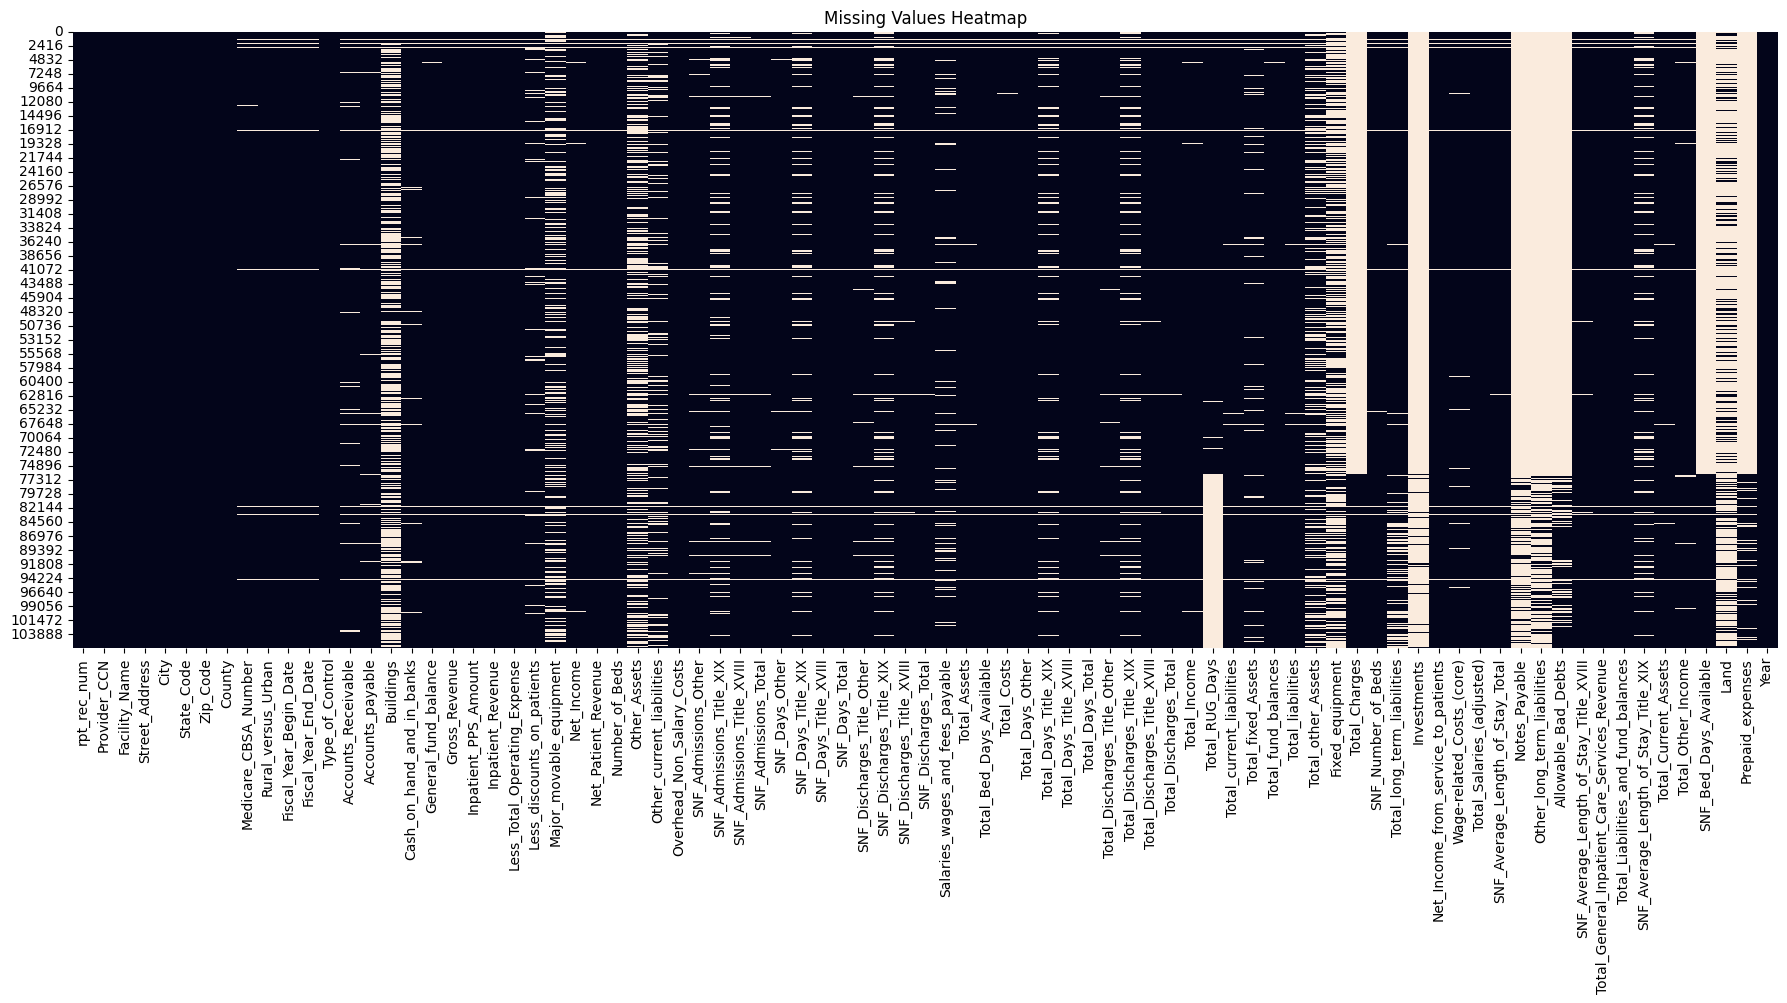

In [37]:
# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


### I have this dataset that are mostly filled variables and important, highly correlated NA variables. I will save this dataset as an option to use in my analysis. But I will further narrow this dataset down to more important variables based on correlation and the groups I initially made. 

In [38]:
# Count the total number of columns in df
num_columns = df.shape[1]

# Display the count
print(f"Total number of variables in df: {num_columns}")

Total number of variables in df: 83


# Limitations 
1. I dropped the columns that were 50% or more NA based on correlation but in groups. The groups were based on related words in the variable. I could've seperated it a different way statistically. 
2. I still have 13 columns with more than 50% missing data. I keep these because they are statistically important to Net_Income compared to other similarly grouped columns. 
3. I went from 90+ columns to 83.

In [39]:
# Export df_Cost to a CSV file
df.to_csv('df_filled_important.csv', index=False)
# then move it to the dataset folder

ASk Ai to seperate the varaibles in groups by relevant 

In [40]:
df# Define the groups
groups = {
    "financial_performance": [
        "Net_Income",
        "Gross_Revenue",
        "Net_Patient_Revenue",
        "Less_Total_Operating_Expense",
        "Less_discounts_on_patients",
        "Total_Income",
        "Total_Charges",
        "Total_Other_Income",
        "Net_Income_from_service_to_patients",
        "Allowable_Bad_Debts",
        "Wage-related_Costs_(core)",
        "Total_Salaries_(adjusted)"
    ],
    "assets_liabilities": [
        "Net_Income",
        "Accounts_Receivable",
        "Accounts_payable",
        "Cash_on_hand_and_in_banks",
        "Total_Assets",
        "Other_Assets",
        "Other_long_term_liabilities",
        "Other_current_liabilities",
        "Total_current_liabilities",
        "Total_long_term_liabilities",
        "Total_liabilities",
        "Total_Liabilities_and_fund_balances",
        "Total_fixed_Assets",
        "Total_fund_balances",
        "Total_other_Assets",
        "Total_Current_Assets",
        "Investments",
        "Buildings",
        "Major_movable_equipment",
        "Fixed_equipment",
        "Land",
        "Prepaid_expenses",
        "Notes_Payable"
    ],
    "patient_care": [
        "Net_Income",
        "Inpatient_PPS_Amount",
        "Inpatient_Revenue",
        "SNF_Admissions_Other",
        "SNF_Admissions_Title_XIX",
        "SNF_Admissions_Title_XVIII",
        "SNF_Admissions_Total",
        "SNF_Days_Other",
        "SNF_Days_Title_XIX",
        "SNF_Days_Title_XVIII",
        "SNF_Days_Total",
        "SNF_Discharges_Title_Other",
        "SNF_Discharges_Title_XIX",
        "SNF_Discharges_Title_XVIII",
        "SNF_Discharges_Total",
        "Total_General_Inpatient_Care_Services_Revenue"
    ],
    "facility_operations": [
        "Net_Income",
        "rpt_rec_num",
        "Provider_CCN",
        "Facility_Name",
        "Street_Address",
        "City",
        "State_Code",
        "Zip_Code",
        "County",
        "Medicare_CBSA_Number",
        "Rural_versus_Urban",
        "Fiscal_Year_Begin_Date",
        "Fiscal_Year_End_Date",
        "Type_of_Control",
        "Total_Bed_Days_Available",
        "Total_Days_Other",
        "Total_Days_Title_XIX",
        "Total_Days_Title_XVIII",
        "Total_Days_Total",
        "Total_Discharges_Title_Other",
        "Total_Discharges_Title_XIX",
        "Total_Discharges_Title_XVIII",
        "Total_Discharges_Total",
        "Total_RUG_Days",
        "Total_Costs",
        "SNF_Number_of_Beds",
        "SNF_Average_Length_of_Stay_Total",
        "SNF_Average_Length_of_Stay_Title_XVIII",
        "SNF_Average_Length_of_Stay_Title_XIX",
        "SNF_Bed_Days_Available",
        "Year"
    ]
}

# Select a specific group
selected_group = "financial_performance"  # Change this to switch groups
group_df = df[groups[selected_group]]

# Display the first few rows
group_df.head()


Net_Income  Gross_Revenue  Net_Patient_Revenue  \
0    311430.0      1800296.0            1520630.0   
1   -588469.0      2843541.0            2416825.0   
2    -47859.0       613243.0             600033.0   
3    -63638.0      1935277.0            1378163.0   
4     -1613.0       818175.0             769155.0   

   Less_Total_Operating_Expense  Less_discounts_on_patients  Total_Income  \
0                     1209322.0                    279666.0      311431.0   
1                     3005301.0                    426716.0     -588469.0   
2                      639168.0                     13210.0      -30743.0   
3                     1444469.0                    557114.0      -63638.0   
4                      775242.0                     49020.0       -1613.0   

   Total_Charges  Total_Other_Income  Net_Income_from_service_to_patients  \
0            NaN               123.0                             311308.0   
1            NaN                 7.0                            -588476.0   
2            NaN              8392.0                             -39135.0   
3            NaN              2668.0                             -66306.0   
4            NaN              4474.0                              -6087.0   

   Allowable_Bad_Debts  Wage-related_Costs_(core)  Total_Salaries_(adjusted)  
0                  NaN                    80664.0                   660232.0  
1                  NaN                   559430.0                  1118860.0  
2                  NaN                    42209.0                   348614.0  
3                  NaN                   113676.0                   601118.0  
4                  NaN                    99778.0                   363088.0

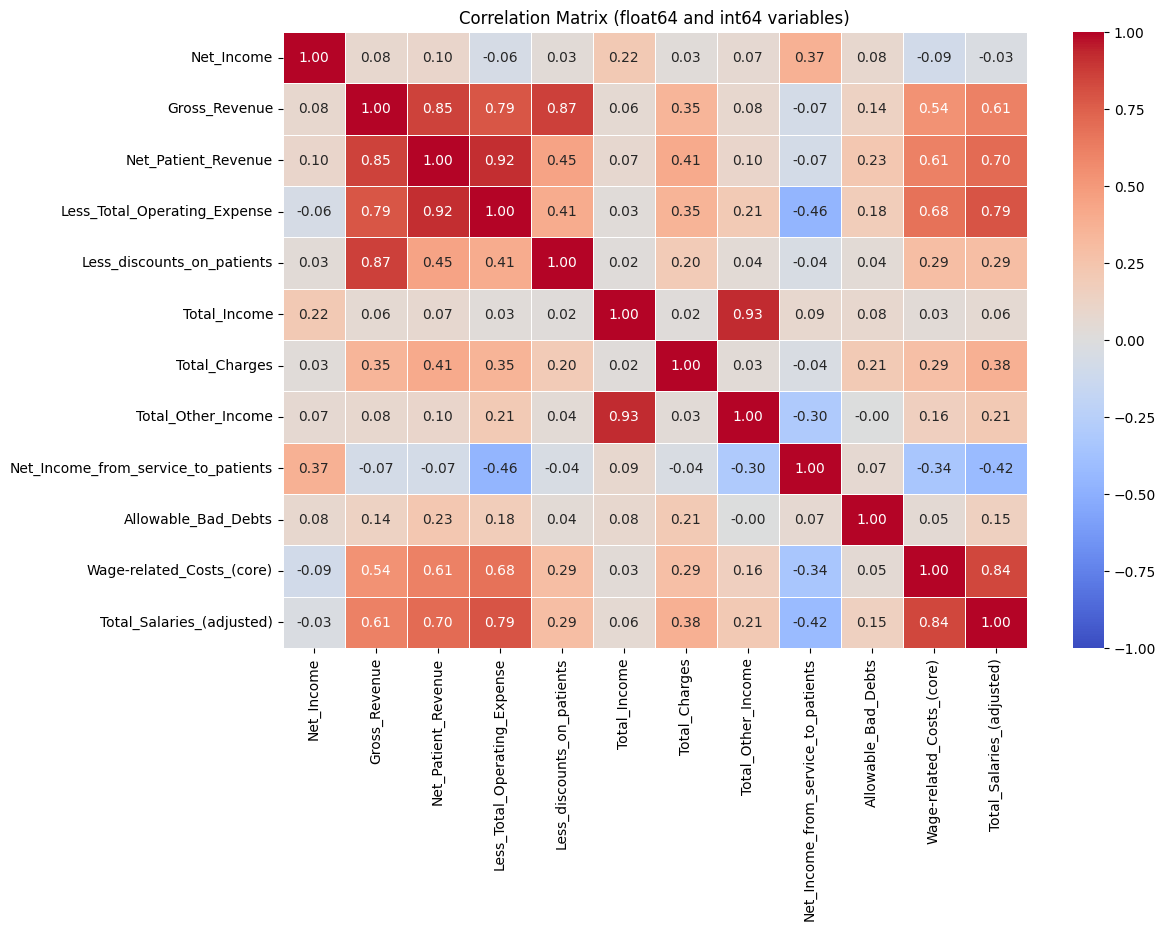

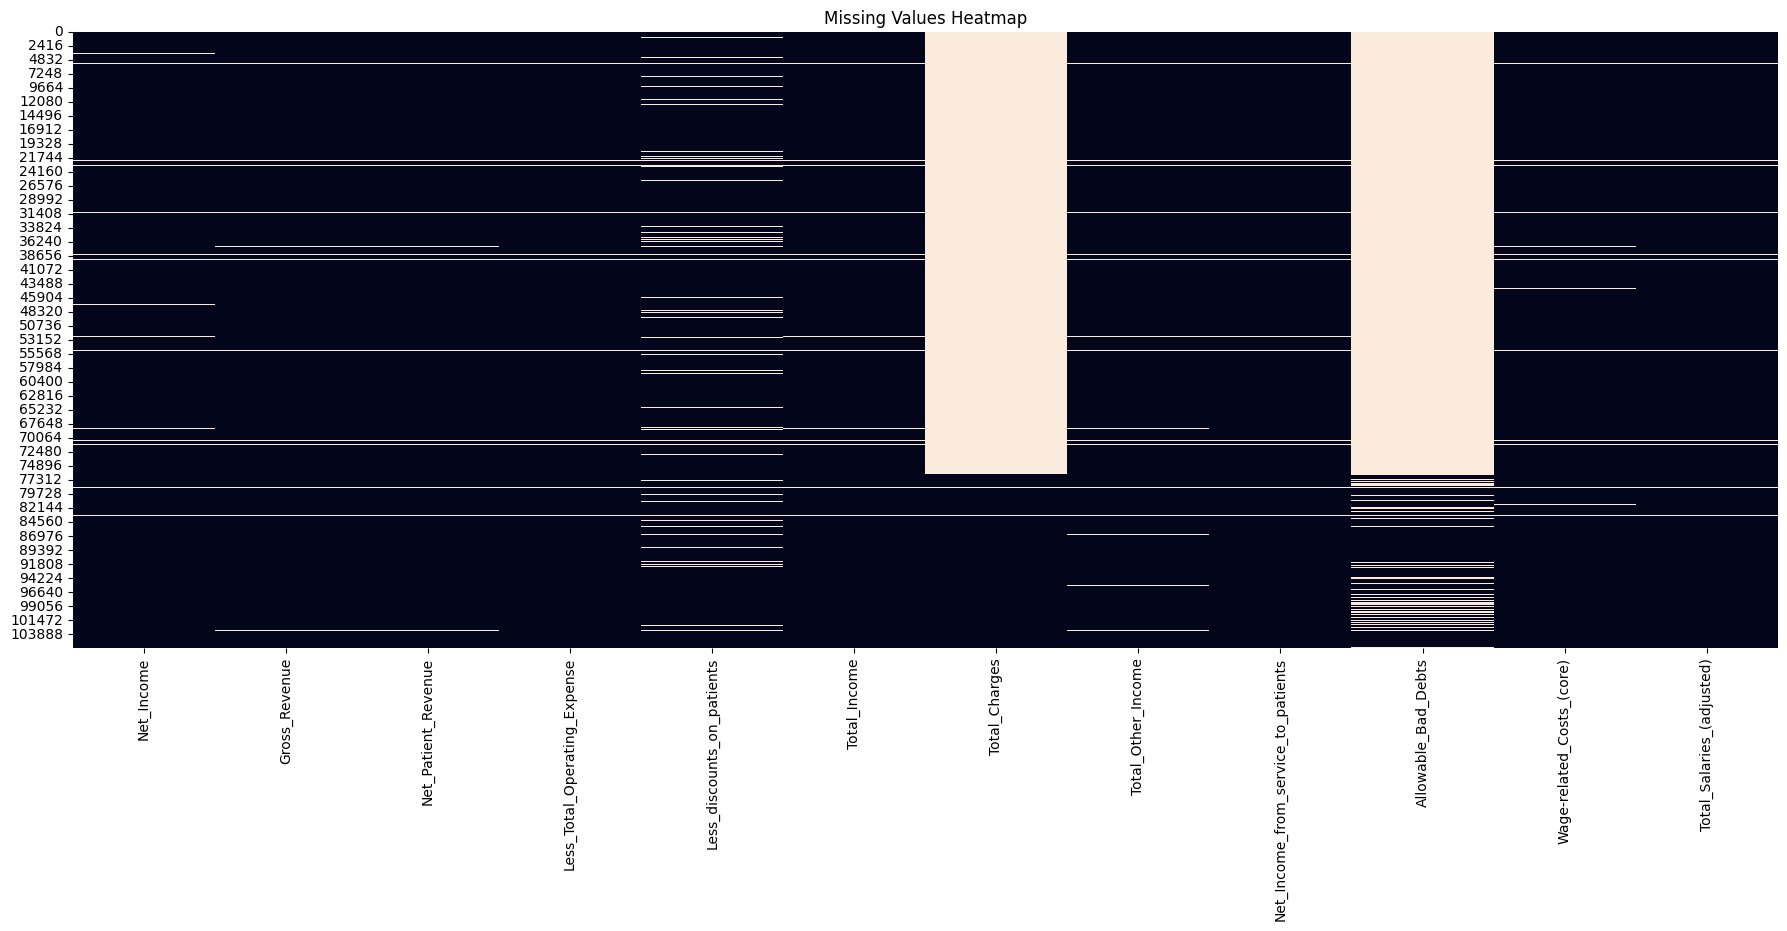

In [41]:
# Select numerical columns (float64 and int64)
num_cols = group_df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group_df[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group_df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [42]:
import numpy as np

# Compute correlation matrix for numerical columns
corr_matrix = group_df.select_dtypes(include=['float64', 'int64']).corr().abs()

# Identify pairs with high correlation (>= 0.7)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Avoid duplicates
        if corr_matrix.iloc[i, j] >= 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert list to DataFrame for better visualization
import pandas as pd
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable_1', 'Variable_2', 'Correlation'])

# Display highly correlated variable pairs
print("Highly Correlated Pairs (|r| ≥ 0.7):")
print(high_corr_df)


Highly Correlated Pairs (|r| ≥ 0.7):
                     Variable_1                    Variable_2  Correlation
0                 Gross_Revenue           Net_Patient_Revenue     0.853230
1                 Gross_Revenue  Less_Total_Operating_Expense     0.785612
2                 Gross_Revenue    Less_discounts_on_patients     0.865487
3           Net_Patient_Revenue  Less_Total_Operating_Expense     0.916996
4           Net_Patient_Revenue     Total_Salaries_(adjusted)     0.704430
5  Less_Total_Operating_Expense     Total_Salaries_(adjusted)     0.794406
6                  Total_Income            Total_Other_Income     0.926185
7     Wage-related_Costs_(core)     Total_Salaries_(adjusted)     0.841402


In [43]:
# Compute correlation of each variable with Net_Income
correlation_with_net_income = corr_matrix["Net_Income"]

# List of variables to drop (the ones with lower correlation with Net_Income)
vars_to_drop = []
net_income_correlations = []  # Store correlations of both variables for reference

for var1, var2, _ in high_corr_pairs:
    cor_var1 = correlation_with_net_income[var1]
    cor_var2 = correlation_with_net_income[var2]

    # Store correlations for reference
    net_income_correlations.append((var1, cor_var1))
    net_income_correlations.append((var2, cor_var2))

    # Drop the variable with the lower absolute correlation with Net_Income
    if abs(cor_var1) < abs(cor_var2):
        vars_to_drop.append(var1)
    else:
        vars_to_drop.append(var2)

# Remove duplicates (in case the same variable appeared multiple times)
vars_to_drop = list(set(vars_to_drop))

# Convert to DataFrame for better visualization
net_income_cor_df = pd.DataFrame(net_income_correlations, columns=["Variable", "Correlation_with_Net_Income"]).drop_duplicates()

# Display variables to be dropped and their correlations
print("Variables to drop due to multicollinearity:")
print(vars_to_drop)

# Display the correlation of all variables involved in multicollinearity with Net_Income
print("\nCorrelation of Multicollinear Variables with Net_Income:")
print(net_income_cor_df)


Variables to drop due to multicollinearity:
['Total_Other_Income', 'Gross_Revenue', 'Less_discounts_on_patients', 'Total_Salaries_(adjusted)', 'Less_Total_Operating_Expense']

Correlation of Multicollinear Variables with Net_Income:
                        Variable  Correlation_with_Net_Income
0                  Gross_Revenue                     0.081916
1            Net_Patient_Revenue                     0.098571
3   Less_Total_Operating_Expense                     0.059590
5     Less_discounts_on_patients                     0.031532
9      Total_Salaries_(adjusted)                     0.026775
12                  Total_Income                     0.216579
13            Total_Other_Income                     0.066856
14     Wage-related_Costs_(core)                     0.088911


In [44]:
# Drop the lesser correlated variables
df = df.drop(columns=vars_to_drop)

# Display the cleaned DataFrame
print("Dataset after dropping multicollinear variables:")
df.head()


Dataset after dropping multicollinear variables:


rpt_rec_num  Provider_CCN                         Facility_Name  \
0      1089712        495134  RIDGECREST MANOR NURSING & REHAB CTR   
1      1091410         75417        REGENCY HEIGHTS OF NORWICH LLC   
2      1093283        165252            WESTVIEW ACRES CARE CENTER   
3      1095547        225497          VERO HEALTH & REHAB  PARKWAY   
4      1095966        265161         WILSONS CREEK NURSING & REHAB   

         Street_Address          City State_Code Zip_Code      County  \
0  157 ROSS-CARTER BLVD      DUFFIELD         VA    24244       SCOTT   
1      60 CROUCH AVENUE       NORWICH         CT     6360  NEW LONDON   
2       203 SW LORRAINE          LEON         IA    50144     DECATUR   
3      1190 VFW PARKWAY  WEST ROXBURY         MA     2132     SUFFOLK   
4   3403 WEST MT VERNON   SPRINGFIELD         MO    65802      GREENE   

  Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
0              28700.0                  U              11/1/2014   
1              35980.0                  U              10/1/2014   
2              99916.0                  R              10/1/2014   
3              14454.0                  U              11/1/2014   
4              44180.0                  U              12/1/2014   

  Fiscal_Year_End_Date  Type_of_Control  Accounts_Receivable  \
0           12/31/2014              4.0            1366877.0   
1           12/14/2014              4.0            1326379.0   
2           12/31/2014              4.0             135859.0   
3           12/31/2014              4.0            1222903.0   
4           12/31/2014              4.0             634347.0   

   Accounts_payable  Buildings  Cash_on_hand_and_in_banks  \
0          292277.0        NaN                    54091.0   
1               NaN        NaN                  -339775.0   
2           79894.0        NaN                    87279.0   
3          537451.0        NaN                   352766.0   
4          253637.0        NaN                    49316.0   

   General_fund_balance  Inpatient_PPS_Amount  Inpatient_Revenue  \
0              311430.0              154022.0          1800296.0   
1            -4896947.0              393088.0          2843541.0   
2               52141.0               20234.0           613243.0   
3                6382.0              172528.0          1935277.0   
4               -1613.0               46270.0           818175.0   

   Major_movable_equipment  Net_Income  Net_Patient_Revenue  Number_of_Beds  \
0                  59343.0    311430.0            1520630.0           120.0   
1                 407352.0   -588469.0            2416825.0           114.0   
2                      NaN    -47859.0             600033.0            60.0   
3                      NaN    -63638.0            1378163.0           141.0   
4                      NaN     -1613.0             769155.0           172.0   

   Other_Assets  Other_current_liabilities  Overhead_Non_Salary_Costs  \
0           NaN                     5667.0                   549090.0   
1       36000.0                  2596536.0                  1886441.0   
2           NaN                    25982.0                   290554.0   
3           NaN                    97267.0                   839217.0   
4           NaN                    50688.0                   412154.0   

   SNF_Admissions_Other  SNF_Admissions_Title_XIX  SNF_Admissions_Title_XVIII  \
0                   2.0                      40.0                         6.0   
1                  38.0                       NaN                        23.0   
2                   5.0                       4.0                         3.0   
3                  15.0                      15.0                         9.0   
4                   3.0                      20.0                         3.0   

   SNF_Admissions_Total  SNF_Days_Other  SNF_Days_Title_XIX  \
0                  48.0           534.0              5853.0   
1                  61.0          7241.0       

In [45]:
# Select a specific group
selected_group = "assets_liabilities"  # Change this to switch groups
group_df = df[groups[selected_group]]

# Display the first few rows
group_df.head()

Net_Income  Accounts_Receivable  Accounts_payable  \
0    311430.0            1366877.0          292277.0   
1   -588469.0            1326379.0               NaN   
2    -47859.0             135859.0           79894.0   
3    -63638.0            1222903.0          537451.0   
4     -1613.0             634347.0          253637.0   

   Cash_on_hand_and_in_banks  Total_Assets  Other_Assets  \
0                    54091.0      765020.0           NaN   
1                  -339775.0     1687456.0       36000.0   
2                    87279.0      244239.0           NaN   
3                   352766.0     1830758.0           NaN   
4                    49316.0      807209.0           NaN   

   Other_long_term_liabilities  Other_current_liabilities  \
0                          NaN                     5667.0   
1                          NaN                  2596536.0   
2                          NaN                    25982.0   
3                          NaN                    97267.0   
4                          NaN                    50688.0   

   Total_current_liabilities  Total_long_term_liabilities  Total_liabilities  \
0                   453591.0                         -1.0           453590.0   
1                  2765768.0                    3818635.0          6584403.0   
2                   192098.0                          0.0           192098.0   
3                  1824376.0                          0.0          1824376.0   
4                   808822.0                          0.0           808822.0   

   Total_Liabilities_and_fund_balances  Total_fixed_Assets  \
0                             765020.0             55061.0   
1                            1687456.0            671306.0   
2                             244239.0                 NaN   
3                            1830758.0             26949.0   
4                             807209.0                 NaN   

   Total_fund_balances  Total_other_Assets  Total_Current_Assets  Investments  \
0             311430.0           -729268.0             1439227.0          NaN   
1           -4896947.0             36000.0              980150.0          NaN   
2              52141.0                 NaN              244239.0          NaN   
3               6382.0             74985.0             1728824.0          NaN   
4              -1613.0                 NaN              807209.0          NaN   

   Buildings  Major_movable_equipment  Fixed_equipment Land  Prepaid_expenses  \
0        NaN                  59343.0              NaN  NaN               NaN   
1        NaN                 407352.0              NaN  NaN               NaN   
2        NaN                      NaN              NaN  NaN               NaN   
3        NaN                      NaN              NaN  NaN               NaN   
4        NaN                      NaN              NaN  NaN               NaN   

   Notes_Payable  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

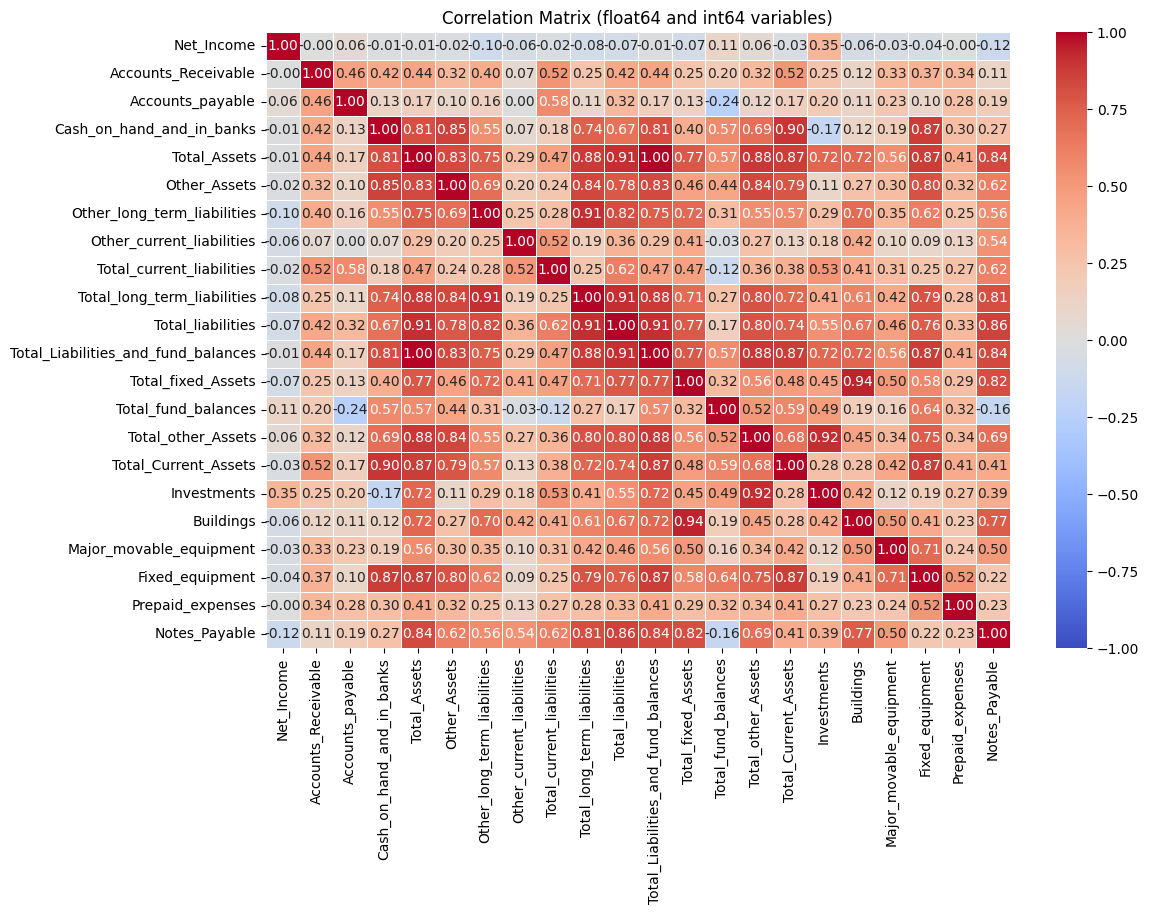

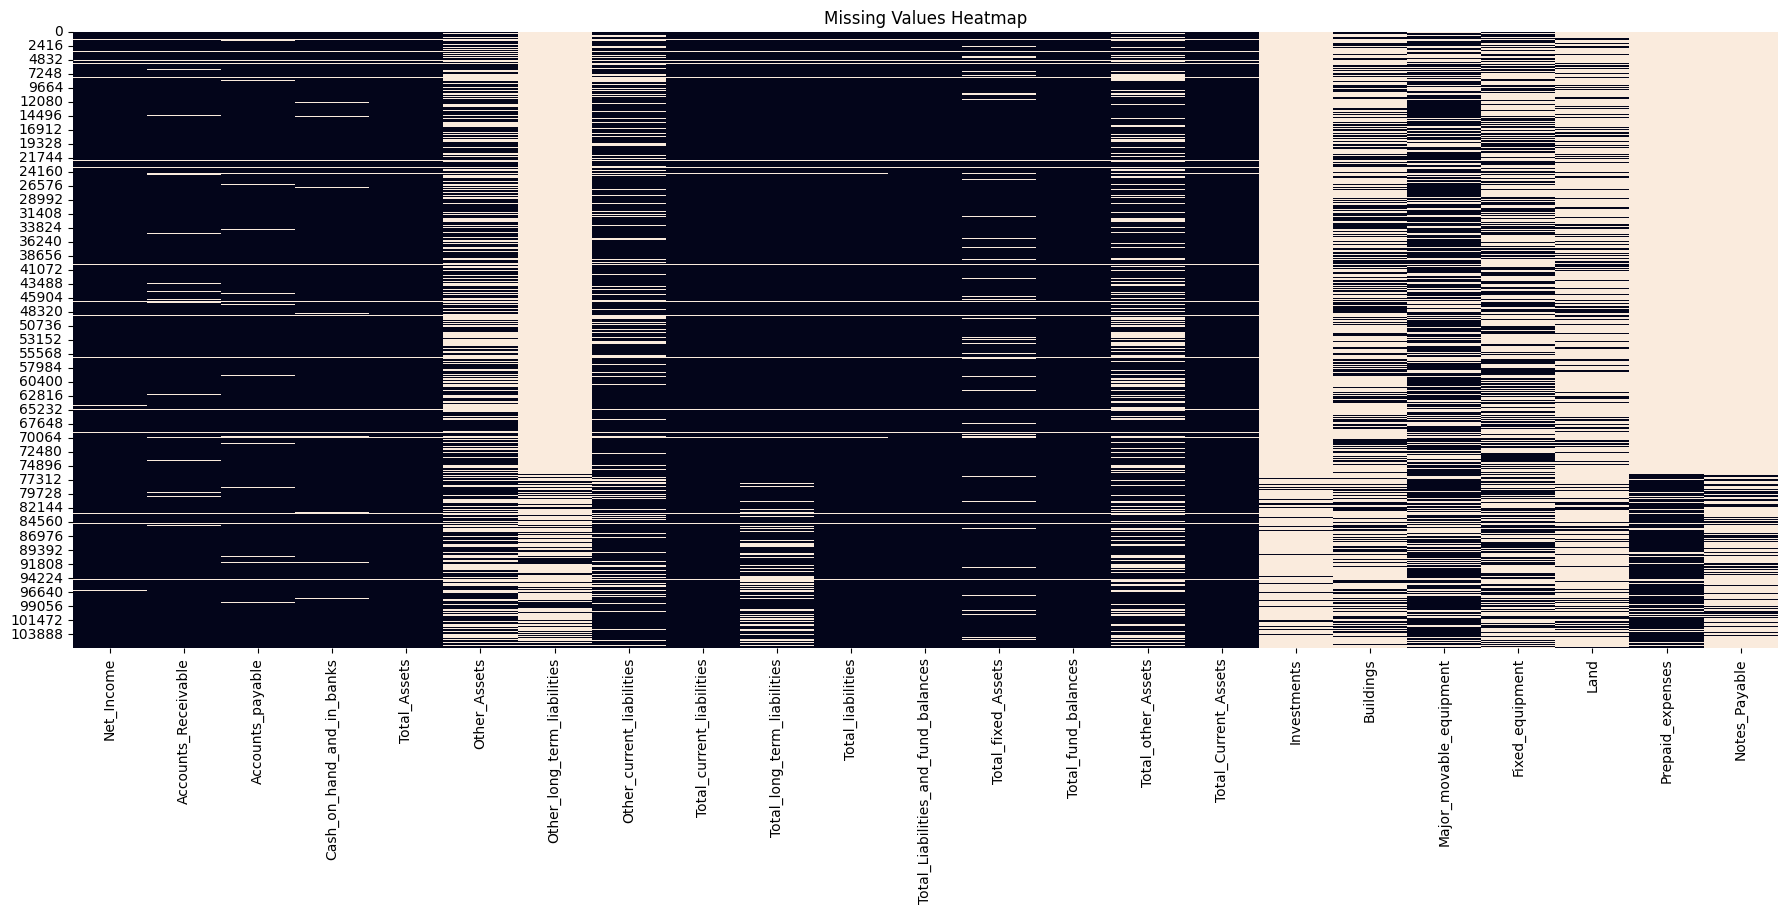

In [46]:
# Select numerical columns (float64 and int64)
num_cols = group_df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group_df[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group_df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [47]:
import numpy as np
import pandas as pd

# Compute percentage of missing values for each column
missing_percentage = group_df.isnull().mean() * 100

# Exclude columns with more than 50% missing values
valid_columns = missing_percentage[missing_percentage <= 50].index

# Compute correlation matrix for the filtered numerical columns
corr_matrix = group_df[valid_columns].select_dtypes(include=['float64', 'int64']).corr().abs()

# Identify pairs with high correlation (>= 0.7)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Avoid duplicates
        if corr_matrix.iloc[i, j] >= 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert list to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable_1', 'Variable_2', 'Correlation'])

# Display highly correlated variable pairs
print("Highly Correlated Pairs (|r| ≥ 0.7) excluding variables with >50% missing values:")
high_corr_df


Highly Correlated Pairs (|r| ≥ 0.7) excluding variables with >50% missing values:


Variable_1                           Variable_2  \
0             Cash_on_hand_and_in_banks                         Total_Assets   
1             Cash_on_hand_and_in_banks                         Other_Assets   
2             Cash_on_hand_and_in_banks          Total_long_term_liabilities   
3             Cash_on_hand_and_in_banks  Total_Liabilities_and_fund_balances   
4             Cash_on_hand_and_in_banks                 Total_Current_Assets   
5                          Total_Assets                         Other_Assets   
6                          Total_Assets          Total_long_term_liabilities   
7                          Total_Assets                    Total_liabilities   
8                          Total_Assets  Total_Liabilities_and_fund_balances   
9                          Total_Assets                   Total_fixed_Assets   
10                         Total_Assets                   Total_other_Assets   
11                         Total_Assets                 Total_Current_Assets   
12                         Other_Assets          Total_long_term_liabilities   
13                         Other_Assets                    Total_liabilities   
14                         Other_Assets  Total_Liabilities_and_fund_balances   
15                         Other_Assets                   Total_other_Assets   
16                         Other_Assets                 Total_Current_Assets   
17          Total_long_term_liabilities                    Total_liabilities   
18          Total_long_term_liabilities  Total_Liabilities_and_fund_balances   
19          Total_long_term_liabilities                   Total_fixed_Assets   
20          Total_long_term_liabilities                   Total_other_Assets   
21          Total_long_term_liabilities                 Total_Current_Assets   
22                    Total_liabilities  Total_Liabilities_and_fund_balances   
23                    Total_liabilities                   Total_fixed_Assets   
24                    Total_liabilities                   Total_other_Assets   
25                    Total_liabilities                 Total_Current_Assets   
26  Total_Liabilities_and_fund_balances                   Total_fixed_Assets   
27  Total_Liabilities_and_fund_balances                   Total_other_Assets   
28  Total_Liabilities_and_fund_balances                 Total_Current_Assets   

    Correlation  
0      0.806470  
1      0.853065  
2      0.742506  
3      0.806468  
4      0.896993  
5      0.833121  
6      0.879282  
7      0.907148  
8      0.999983  
9      0.774405  
10     0.883716  
11     0.872081  
12     0.837597  
13     0.780280  
14     0.833082  
15     0.838716  
16     0.788200  
17     0.914791  
18     0.879286  
19     0.708434  
20     0.802369  
21     0.724293  
22     0.907153  
23     0.768639  
24     0.800491  
25     0.743044  
26     0.774402  
27     0.883685  
28     0.872071

In [48]:
# Compute correlation of each variable with Net_Income
correlation_with_net_income = corr_matrix["Net_Income"]

# List of variables to drop (the ones with lower correlation with Net_Income)
vars_to_drop = []
net_income_correlations = []  # Store correlations of both variables for reference

for var1, var2, _ in high_corr_pairs:
    cor_var1 = correlation_with_net_income[var1]
    cor_var2 = correlation_with_net_income[var2]

    # Store correlations for reference
    net_income_correlations.append((var1, cor_var1))
    net_income_correlations.append((var2, cor_var2))

    # Drop the variable with the lower absolute correlation with Net_Income
    if abs(cor_var1) < abs(cor_var2):
        vars_to_drop.append(var1)
    else:
        vars_to_drop.append(var2)

# Remove duplicates (in case the same variable appeared multiple times)
vars_to_drop = list(set(vars_to_drop))

# Convert to DataFrame for better visualization
net_income_cor_df = pd.DataFrame(net_income_correlations, columns=["Variable", "Correlation_with_Net_Income"]).drop_duplicates()

# Display variables to be dropped and their correlations
print("Variables to drop due to multicollinearity:")
print(vars_to_drop)

# Display the correlation of all variables involved in multicollinearity with Net_Income
print("\nCorrelation of Multicollinear Variables with Net_Income:")
print(net_income_cor_df)


Variables to drop due to multicollinearity:
['Total_liabilities', 'Total_Assets', 'Cash_on_hand_and_in_banks', 'Total_Current_Assets', 'Other_Assets', 'Total_Liabilities_and_fund_balances', 'Total_other_Assets', 'Total_fixed_Assets']

Correlation of Multicollinear Variables with Net_Income:
                               Variable  Correlation_with_Net_Income
0             Cash_on_hand_and_in_banks                     0.011724
1                          Total_Assets                     0.013971
3                          Other_Assets                     0.022875
5           Total_long_term_liabilities                     0.079302
7   Total_Liabilities_and_fund_balances                     0.011372
9                  Total_Current_Assets                     0.025012
15                    Total_liabilities                     0.074091
19                   Total_fixed_Assets                     0.072134
21                   Total_other_Assets                     0.058940


In [49]:
# Drop the lesser correlated variables
df = df.drop(columns=vars_to_drop)

# Display the cleaned DataFrame
print("Dataset after dropping multicollinear variables:")
df.head()


Dataset after dropping multicollinear variables:


rpt_rec_num  Provider_CCN                         Facility_Name  \
0      1089712        495134  RIDGECREST MANOR NURSING & REHAB CTR   
1      1091410         75417        REGENCY HEIGHTS OF NORWICH LLC   
2      1093283        165252            WESTVIEW ACRES CARE CENTER   
3      1095547        225497          VERO HEALTH & REHAB  PARKWAY   
4      1095966        265161         WILSONS CREEK NURSING & REHAB   

         Street_Address          City State_Code Zip_Code      County  \
0  157 ROSS-CARTER BLVD      DUFFIELD         VA    24244       SCOTT   
1      60 CROUCH AVENUE       NORWICH         CT     6360  NEW LONDON   
2       203 SW LORRAINE          LEON         IA    50144     DECATUR   
3      1190 VFW PARKWAY  WEST ROXBURY         MA     2132     SUFFOLK   
4   3403 WEST MT VERNON   SPRINGFIELD         MO    65802      GREENE   

  Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
0              28700.0                  U              11/1/2014   
1              35980.0                  U              10/1/2014   
2              99916.0                  R              10/1/2014   
3              14454.0                  U              11/1/2014   
4              44180.0                  U              12/1/2014   

  Fiscal_Year_End_Date  Type_of_Control  Accounts_Receivable  \
0           12/31/2014              4.0            1366877.0   
1           12/14/2014              4.0            1326379.0   
2           12/31/2014              4.0             135859.0   
3           12/31/2014              4.0            1222903.0   
4           12/31/2014              4.0             634347.0   

   Accounts_payable  Buildings  General_fund_balance  Inpatient_PPS_Amount  \
0          292277.0        NaN              311430.0              154022.0   
1               NaN        NaN            -4896947.0              393088.0   
2           79894.0        NaN               52141.0               20234.0   
3          537451.0        NaN                6382.0              172528.0   
4          253637.0        NaN               -1613.0               46270.0   

   Inpatient_Revenue  Major_movable_equipment  Net_Income  \
0          1800296.0                  59343.0    311430.0   
1          2843541.0                 407352.0   -588469.0   
2           613243.0                      NaN    -47859.0   
3          1935277.0                      NaN    -63638.0   
4           818175.0                      NaN     -1613.0   

   Net_Patient_Revenue  Number_of_Beds  Other_current_liabilities  \
0            1520630.0           120.0                     5667.0   
1            2416825.0           114.0                  2596536.0   
2             600033.0            60.0                    25982.0   
3            1378163.0           141.0                    97267.0   
4             769155.0           172.0                    50688.0   

   Overhead_Non_Salary_Costs  SNF_Admissions_Other  SNF_Admissions_Title_XIX  \
0                   549090.0                   2.0                      40.0   
1                  1886441.0                  38.0                       NaN   
2                   290554.0                   5.0                       4.0   
3                   839217.0                  15.0                      15.0   
4                   412154.0                   3.0                      20.0   

   SNF_Admissions_Title_XVIII  SNF_Admissions_Total  SNF_Days_Other  \
0                         6.0                  48.0           534.0   
1                        23.0                  61.0          7241.0   
2                         3.0                  12.0           956.0   
3                         9.0                  39.0          2883.0   
4                         3.0                  26.0           678.0   

   SNF_Days_Title_XIX  SNF_Days_Title_XVIII  SNF_Days_Total  \
0              5853.0                 333.0          6720.0   
1                 NaN                 856.0          8097.0   
2

In [50]:
# Select a specific group
selected_group = "patient_care"  # Change this to switch groups
group_df = df[groups[selected_group]]

# Display the first few rows
group_df.head()

Net_Income  Inpatient_PPS_Amount  Inpatient_Revenue  SNF_Admissions_Other  \
0    311430.0              154022.0          1800296.0                   2.0   
1   -588469.0              393088.0          2843541.0                  38.0   
2    -47859.0               20234.0           613243.0                   5.0   
3    -63638.0              172528.0          1935277.0                  15.0   
4     -1613.0               46270.0           818175.0                   3.0   

   SNF_Admissions_Title_XIX  SNF_Admissions_Title_XVIII  SNF_Admissions_Total  \
0                      40.0                         6.0                  48.0   
1                       NaN                        23.0                  61.0   
2                       4.0                         3.0                  12.0   
3                      15.0                         9.0                  39.0   
4                      20.0                         3.0                  26.0   

   SNF_Days_Other  SNF_Days_Title_XIX  SNF_Days_Title_XVIII  SNF_Days_Total  \
0           534.0              5853.0                 333.0          6720.0   
1          7241.0                 NaN                 856.0          8097.0   
2           956.0              2548.0                  71.0          3575.0   
3          2883.0              2881.0                 349.0          6113.0   
4           678.0              3945.0                 111.0          4734.0   

   SNF_Discharges_Title_Other  SNF_Discharges_Title_XIX  \
0                         9.0                      35.0   
1                        36.0                       NaN   
2                         3.0                       3.0   
3                        13.0                      13.0   
4                         4.0                      24.0   

   SNF_Discharges_Title_XVIII  SNF_Discharges_Total  \
0                         5.0                  49.0   
1                        23.0                  59.0   
2                         3.0                   9.0   
3                         6.0                  32.0   
4                         NaN                  28.0   

   Total_General_Inpatient_Care_Services_Revenue  
0                                      1182049.0  
1                                      2429100.0  
2                                       596683.0  
3                                      1770950.0  
4                                       748924.0

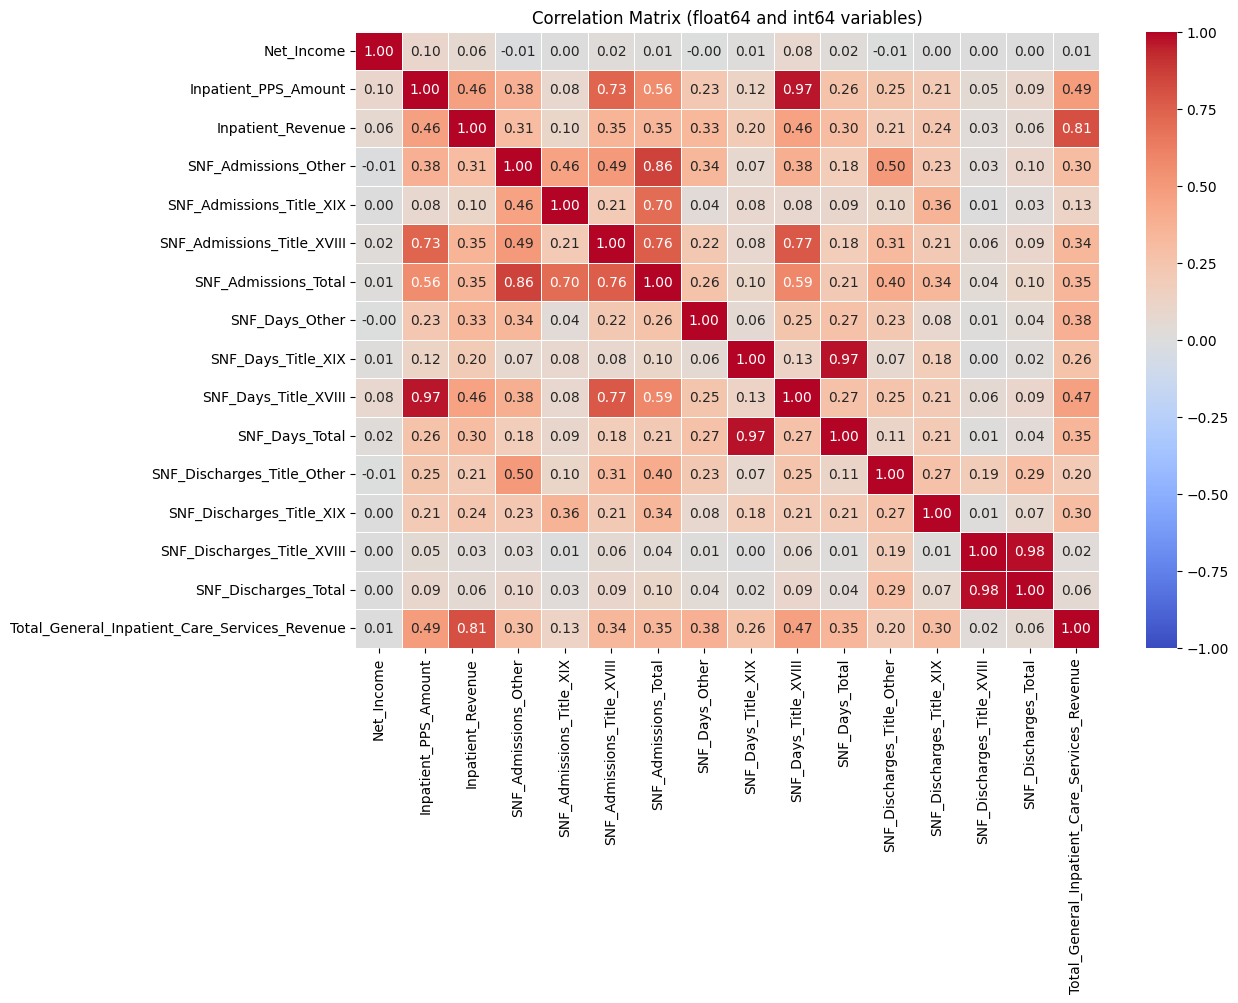

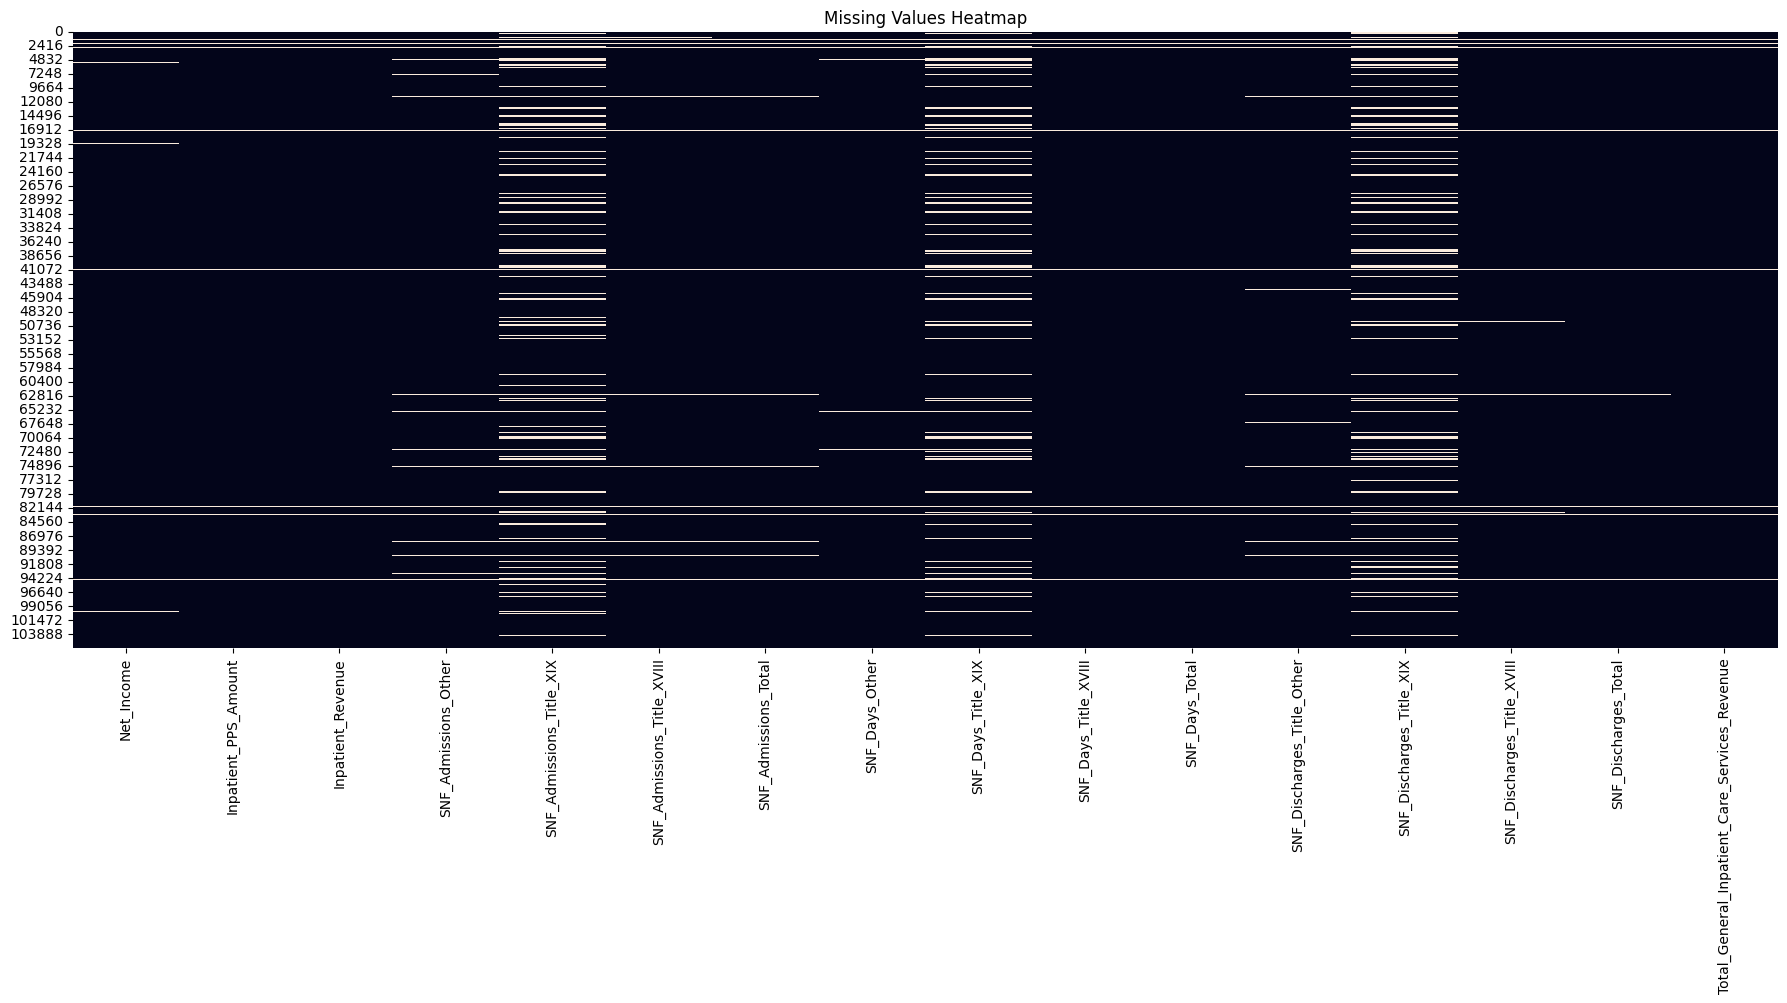

In [51]:
# Select numerical columns (float64 and int64)
num_cols = group_df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group_df[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group_df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [52]:
import numpy as np
import pandas as pd

# Compute percentage of missing values for each column
missing_percentage = group_df.isnull().mean() * 100

# Exclude columns with more than 50% missing values
valid_columns = missing_percentage[missing_percentage <= 50].index

# Compute correlation matrix for the filtered numerical columns
corr_matrix = group_df[valid_columns].select_dtypes(include=['float64', 'int64']).corr().abs()

# Identify pairs with high correlation (>= 0.7)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Avoid duplicates
        if corr_matrix.iloc[i, j] >= 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert list to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable_1', 'Variable_2', 'Correlation'])

# Display highly correlated variable pairs
print("Highly Correlated Pairs (|r| ≥ 0.7) excluding variables with >50% missing values:")
high_corr_df


Highly Correlated Pairs (|r| ≥ 0.7) excluding variables with >50% missing values:


Variable_1                                     Variable_2  \
0        Inpatient_PPS_Amount                     SNF_Admissions_Title_XVIII   
1        Inpatient_PPS_Amount                           SNF_Days_Title_XVIII   
2           Inpatient_Revenue  Total_General_Inpatient_Care_Services_Revenue   
3        SNF_Admissions_Other                           SNF_Admissions_Total   
4  SNF_Admissions_Title_XVIII                           SNF_Admissions_Total   
5  SNF_Admissions_Title_XVIII                           SNF_Days_Title_XVIII   
6          SNF_Days_Title_XIX                                 SNF_Days_Total   
7  SNF_Discharges_Title_XVIII                           SNF_Discharges_Total   

   Correlation  
0     0.730029  
1     0.968058  
2     0.810123  
3     0.855928  
4     0.759541  
5     0.774195  
6     0.969637  
7     0.978397

In [53]:
# Compute correlation of each variable with Net_Income
correlation_with_net_income = corr_matrix["Net_Income"]

# List of variables to drop (the ones with lower correlation with Net_Income)
vars_to_drop = []
net_income_correlations = []  # Store correlations of both variables for reference

for var1, var2, _ in high_corr_pairs:
    cor_var1 = correlation_with_net_income[var1]
    cor_var2 = correlation_with_net_income[var2]

    # Store correlations for reference
    net_income_correlations.append((var1, cor_var1))
    net_income_correlations.append((var2, cor_var2))

    # Drop the variable with the lower absolute correlation with Net_Income
    if abs(cor_var1) < abs(cor_var2):
        vars_to_drop.append(var1)
    else:
        vars_to_drop.append(var2)

# Remove duplicates (in case the same variable appeared multiple times)
vars_to_drop = list(set(vars_to_drop))

# Convert to DataFrame for better visualization
net_income_cor_df = pd.DataFrame(net_income_correlations, columns=["Variable", "Correlation_with_Net_Income"]).drop_duplicates()

# Display variables to be dropped and their correlations
print("Variables to drop due to multicollinearity:")
print(vars_to_drop)

# Display the correlation of all variables involved in multicollinearity with Net_Income
print("\nCorrelation of Multicollinear Variables with Net_Income:")
print(net_income_cor_df)


Variables to drop due to multicollinearity:
['SNF_Days_Title_XIX', 'Total_General_Inpatient_Care_Services_Revenue', 'SNF_Days_Title_XVIII', 'SNF_Discharges_Total', 'SNF_Admissions_Title_XVIII', 'SNF_Admissions_Other', 'SNF_Admissions_Total']

Correlation of Multicollinear Variables with Net_Income:
                                         Variable  Correlation_with_Net_Income
0                            Inpatient_PPS_Amount                     0.098583
1                      SNF_Admissions_Title_XVIII                     0.022840
3                            SNF_Days_Title_XVIII                     0.079900
4                               Inpatient_Revenue                     0.063507
5   Total_General_Inpatient_Care_Services_Revenue                     0.005894
6                            SNF_Admissions_Other                     0.008098
7                            SNF_Admissions_Total                     0.010759
12                             SNF_Days_Title_XIX                   

In [54]:
# Drop the lesser correlated variables
df = df.drop(columns=vars_to_drop)

# Display the cleaned DataFrame
print("Dataset after dropping multicollinear variables:")
df.head()

Dataset after dropping multicollinear variables:


rpt_rec_num  Provider_CCN                         Facility_Name  \
0      1089712        495134  RIDGECREST MANOR NURSING & REHAB CTR   
1      1091410         75417        REGENCY HEIGHTS OF NORWICH LLC   
2      1093283        165252            WESTVIEW ACRES CARE CENTER   
3      1095547        225497          VERO HEALTH & REHAB  PARKWAY   
4      1095966        265161         WILSONS CREEK NURSING & REHAB   

         Street_Address          City State_Code Zip_Code      County  \
0  157 ROSS-CARTER BLVD      DUFFIELD         VA    24244       SCOTT   
1      60 CROUCH AVENUE       NORWICH         CT     6360  NEW LONDON   
2       203 SW LORRAINE          LEON         IA    50144     DECATUR   
3      1190 VFW PARKWAY  WEST ROXBURY         MA     2132     SUFFOLK   
4   3403 WEST MT VERNON   SPRINGFIELD         MO    65802      GREENE   

  Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
0              28700.0                  U              11/1/2014   
1              35980.0                  U              10/1/2014   
2              99916.0                  R              10/1/2014   
3              14454.0                  U              11/1/2014   
4              44180.0                  U              12/1/2014   

  Fiscal_Year_End_Date  Type_of_Control  Accounts_Receivable  \
0           12/31/2014              4.0            1366877.0   
1           12/14/2014              4.0            1326379.0   
2           12/31/2014              4.0             135859.0   
3           12/31/2014              4.0            1222903.0   
4           12/31/2014              4.0             634347.0   

   Accounts_payable  Buildings  General_fund_balance  Inpatient_PPS_Amount  \
0          292277.0        NaN              311430.0              154022.0   
1               NaN        NaN            -4896947.0              393088.0   
2           79894.0        NaN               52141.0               20234.0   
3          537451.0        NaN                6382.0              172528.0   
4          253637.0        NaN               -1613.0               46270.0   

   Inpatient_Revenue  Major_movable_equipment  Net_Income  \
0          1800296.0                  59343.0    311430.0   
1          2843541.0                 407352.0   -588469.0   
2           613243.0                      NaN    -47859.0   
3          1935277.0                      NaN    -63638.0   
4           818175.0                      NaN     -1613.0   

   Net_Patient_Revenue  Number_of_Beds  Other_current_liabilities  \
0            1520630.0           120.0                     5667.0   
1            2416825.0           114.0                  2596536.0   
2             600033.0            60.0                    25982.0   
3            1378163.0           141.0                    97267.0   
4             769155.0           172.0                    50688.0   

   Overhead_Non_Salary_Costs  SNF_Admissions_Title_XIX  SNF_Days_Other  \
0                   549090.0                      40.0           534.0   
1                  1886441.0                       NaN          7241.0   
2                   290554.0                       4.0           956.0   
3                   839217.0                      15.0          2883.0   
4                   412154.0                      20.0           678.0   

   SNF_Days_Total  SNF_Discharges_Title_Other  SNF_Discharges_Title_XIX  \
0          6720.0                         9.0                      35.0   
1          8097.0                        36.0                       NaN   
2          3575.0                         3.0                       3.0   
3          6113.0                        13.0                      13.0   
4          4734.0                         4.0                      24.0   

   SNF_Discharges_Title_XVIII  Salaries_wages_and_fees_payable  \
0                         5.0                         117929.0   
1                        23.0                          12590.0   
2   

In [55]:
# Select a specific group
selected_group = "facility_operations"  # Change this to switch groups
group_df = df[groups[selected_group]]

# Display the first few rows
group_df.head()

Net_Income  rpt_rec_num  Provider_CCN  \
0    311430.0      1089712        495134   
1   -588469.0      1091410         75417   
2    -47859.0      1093283        165252   
3    -63638.0      1095547        225497   
4     -1613.0      1095966        265161   

                          Facility_Name        Street_Address          City  \
0  RIDGECREST MANOR NURSING & REHAB CTR  157 ROSS-CARTER BLVD      DUFFIELD   
1        REGENCY HEIGHTS OF NORWICH LLC      60 CROUCH AVENUE       NORWICH   
2            WESTVIEW ACRES CARE CENTER       203 SW LORRAINE          LEON   
3          VERO HEALTH & REHAB  PARKWAY      1190 VFW PARKWAY  WEST ROXBURY   
4         WILSONS CREEK NURSING & REHAB   3403 WEST MT VERNON   SPRINGFIELD   

  State_Code Zip_Code      County Medicare_CBSA_Number Rural_versus_Urban  \
0         VA    24244       SCOTT              28700.0                  U   
1         CT     6360  NEW LONDON              35980.0                  U   
2         IA    50144     DECATUR              99916.0                  R   
3         MA     2132     SUFFOLK              14454.0                  U   
4         MO    65802      GREENE              44180.0                  U   

  Fiscal_Year_Begin_Date Fiscal_Year_End_Date  Type_of_Control  \
0              11/1/2014           12/31/2014              4.0   
1              10/1/2014           12/14/2014              4.0   
2              10/1/2014           12/31/2014              4.0   
3              11/1/2014           12/31/2014              4.0   
4              12/1/2014           12/31/2014              4.0   

   Total_Bed_Days_Available  Total_Days_Other  Total_Days_Title_XIX  \
0                    7320.0             534.0                5853.0   
1                    8550.0            7241.0                   NaN   
2                    5520.0             956.0                2548.0   
3                    8601.0            2883.0                2881.0   
4                    5332.0             678.0                3945.0   

   Total_Days_Title_XVIII  Total_Days_Total  Total_Discharges_Title_Other  \
0                   333.0            6720.0                           9.0   
1                   856.0            8097.0                          36.0   
2                    71.0            3575.0                           3.0   
3                   349.0            6113.0                          13.0   
4                   111.0            4734.0                           4.0   

   Total_Discharges_Title_XIX  Total_Discharges_Title_XVIII  \
0                        35.0                           5.0   
1                         NaN                          23.0   
2                         3.0                           3.0   
3                        13.0                           6.0   
4                        24.0                           NaN   

   Total_Discharges_Total  Total_RUG_Days  Total_Costs  SNF_Number_of_Beds  \
0                    49.0           333.0     211585.0               120.0   
1                    59.0           856.0     207903.0               114.0   
2                     9.0            71.0      22920.0                60.0   
3                    32.0           349.0     158386.0               141.0   
4                    28.0           111.0      56556.0               172.0   

   SNF_Average_Length_of_Stay_Total  SNF_Average_Length_of_Stay_Title_XVIII  \
0                            137.14                                   66.60   
1                            137.24                                   37.22   
2                            397.22                                   23.67   
3                            191.03                                   58.17   
4                            169.07                                     NaN   

   SNF_Average_Length_of_Stay_Title_XIX  SNF_Bed_Days_Available  Year  
0                                167.23                     NaN  2015  
1                                   NaN       

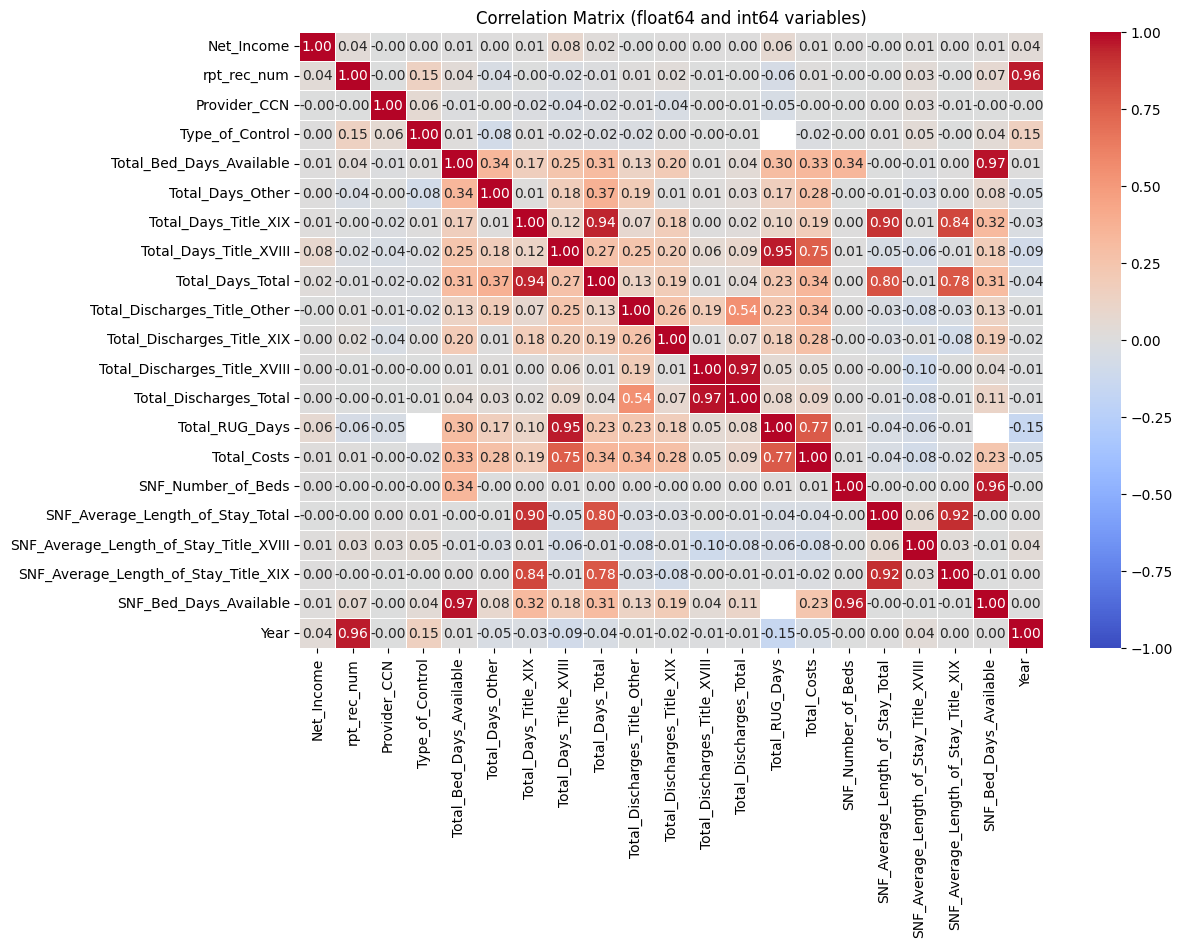

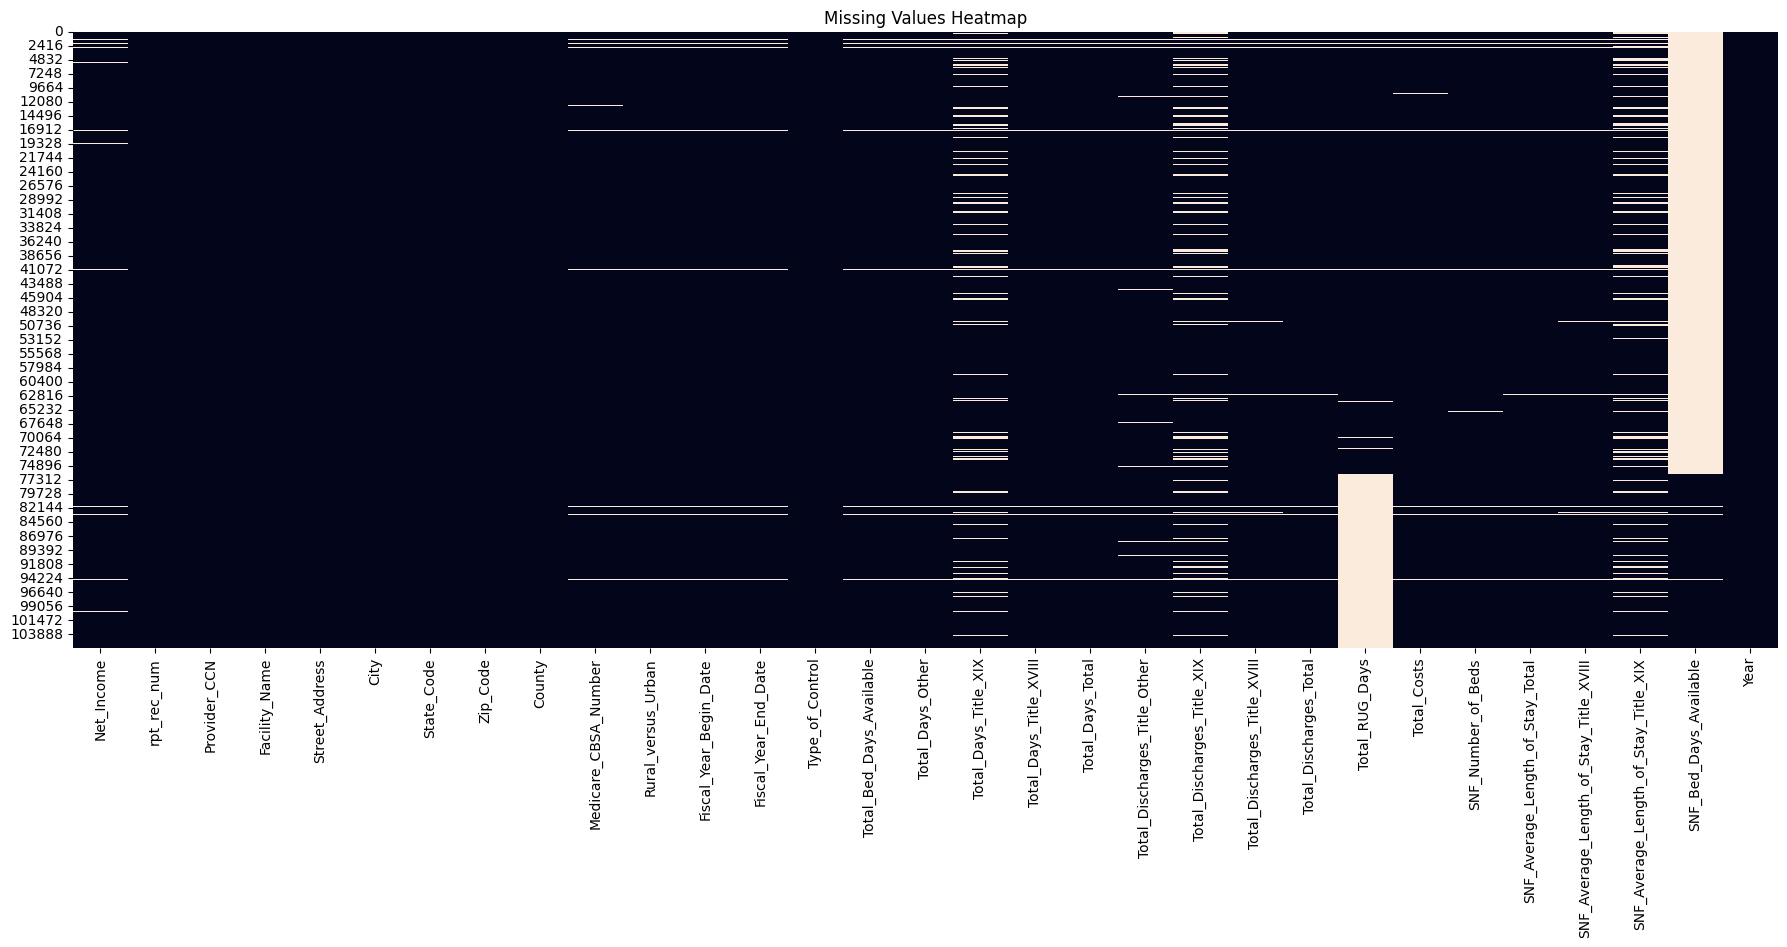

In [56]:
# Select numerical columns (float64 and int64)
num_cols = group_df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix for the selected columns
corr_matrix = group_df[num_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (float64 and int64 variables)")
plt.show()

# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(group_df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [57]:
import numpy as np
import pandas as pd

# Compute percentage of missing values for each column
missing_percentage = group_df.isnull().mean() * 100

# Exclude columns with more than 50% missing values
valid_columns = missing_percentage[missing_percentage <= 50].index

# Compute correlation matrix for the filtered numerical columns
corr_matrix = group_df[valid_columns].select_dtypes(include=['float64', 'int64']).corr().abs()

# Identify pairs with high correlation (>= 0.7)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Avoid duplicates
        if corr_matrix.iloc[i, j] >= 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert list to DataFrame for better visualization
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Variable_1', 'Variable_2', 'Correlation'])

# Display highly correlated variable pairs
print("Highly Correlated Pairs (|r| ≥ 0.7) excluding variables with >50% missing values:")
high_corr_df


Highly Correlated Pairs (|r| ≥ 0.7) excluding variables with >50% missing values:


Variable_1                            Variable_2  \
0                        rpt_rec_num                                  Year   
1               Total_Days_Title_XIX                      Total_Days_Total   
2               Total_Days_Title_XIX      SNF_Average_Length_of_Stay_Total   
3               Total_Days_Title_XIX  SNF_Average_Length_of_Stay_Title_XIX   
4             Total_Days_Title_XVIII                        Total_RUG_Days   
5             Total_Days_Title_XVIII                           Total_Costs   
6                   Total_Days_Total      SNF_Average_Length_of_Stay_Total   
7                   Total_Days_Total  SNF_Average_Length_of_Stay_Title_XIX   
8       Total_Discharges_Title_XVIII                Total_Discharges_Total   
9                     Total_RUG_Days                           Total_Costs   
10  SNF_Average_Length_of_Stay_Total  SNF_Average_Length_of_Stay_Title_XIX   

    Correlation  
0      0.959063  
1      0.941090  
2      0.902536  
3      0.836504  
4      0.953294  
5      0.751914  
6      0.799797  
7      0.775909  
8      0.972406  
9      0.773068  
10     0.917686

In [58]:
# Compute correlation of each variable with Net_Income
correlation_with_net_income = corr_matrix["Net_Income"]

# List of variables to drop (the ones with lower correlation with Net_Income)
vars_to_drop = []
net_income_correlations = []  # Store correlations of both variables for reference

for var1, var2, _ in high_corr_pairs:
    cor_var1 = correlation_with_net_income[var1]
    cor_var2 = correlation_with_net_income[var2]

    # Store correlations for reference
    net_income_correlations.append((var1, cor_var1))
    net_income_correlations.append((var2, cor_var2))

    # Drop the variable with the lower absolute correlation with Net_Income
    if abs(cor_var1) < abs(cor_var2):
        vars_to_drop.append(var1)
    else:
        vars_to_drop.append(var2)

# Remove duplicates (in case the same variable appeared multiple times)
vars_to_drop = list(set(vars_to_drop))

# Convert to DataFrame for better visualization
net_income_cor_df = pd.DataFrame(net_income_correlations, columns=["Variable", "Correlation_with_Net_Income"]).drop_duplicates()

# Display variables to be dropped and their correlations
print("Variables to drop due to multicollinearity:")
print(vars_to_drop)

# Display the correlation of all variables involved in multicollinearity with Net_Income
print("\nCorrelation of Multicollinear Variables with Net_Income:")
print(net_income_cor_df)


Variables to drop due to multicollinearity:
['Total_Costs', 'Total_RUG_Days', 'Year', 'SNF_Average_Length_of_Stay_Title_XIX', 'Total_Discharges_Total', 'Total_Days_Title_XIX', 'SNF_Average_Length_of_Stay_Total']

Correlation of Multicollinear Variables with Net_Income:
                                Variable  Correlation_with_Net_Income
0                            rpt_rec_num                     0.038690
1                                   Year                     0.038141
2                   Total_Days_Title_XIX                     0.008586
3                       Total_Days_Total                     0.020810
5       SNF_Average_Length_of_Stay_Total                     0.001523
7   SNF_Average_Length_of_Stay_Title_XIX                     0.002720
8                 Total_Days_Title_XVIII                     0.078339
9                         Total_RUG_Days                     0.064976
11                           Total_Costs                     0.009380
16          Total_Discharges_T

In [59]:
# Drop the lesser correlated variables
df = df.drop(columns=vars_to_drop)

# Display the cleaned DataFrame
print("Dataset after dropping multicollinear variables:")
df.head()

Dataset after dropping multicollinear variables:


rpt_rec_num  Provider_CCN                         Facility_Name  \
0      1089712        495134  RIDGECREST MANOR NURSING & REHAB CTR   
1      1091410         75417        REGENCY HEIGHTS OF NORWICH LLC   
2      1093283        165252            WESTVIEW ACRES CARE CENTER   
3      1095547        225497          VERO HEALTH & REHAB  PARKWAY   
4      1095966        265161         WILSONS CREEK NURSING & REHAB   

         Street_Address          City State_Code Zip_Code      County  \
0  157 ROSS-CARTER BLVD      DUFFIELD         VA    24244       SCOTT   
1      60 CROUCH AVENUE       NORWICH         CT     6360  NEW LONDON   
2       203 SW LORRAINE          LEON         IA    50144     DECATUR   
3      1190 VFW PARKWAY  WEST ROXBURY         MA     2132     SUFFOLK   
4   3403 WEST MT VERNON   SPRINGFIELD         MO    65802      GREENE   

  Medicare_CBSA_Number Rural_versus_Urban Fiscal_Year_Begin_Date  \
0              28700.0                  U              11/1/2014   
1              35980.0                  U              10/1/2014   
2              99916.0                  R              10/1/2014   
3              14454.0                  U              11/1/2014   
4              44180.0                  U              12/1/2014   

  Fiscal_Year_End_Date  Type_of_Control  Accounts_Receivable  \
0           12/31/2014              4.0            1366877.0   
1           12/14/2014              4.0            1326379.0   
2           12/31/2014              4.0             135859.0   
3           12/31/2014              4.0            1222903.0   
4           12/31/2014              4.0             634347.0   

   Accounts_payable  Buildings  General_fund_balance  Inpatient_PPS_Amount  \
0          292277.0        NaN              311430.0              154022.0   
1               NaN        NaN            -4896947.0              393088.0   
2           79894.0        NaN               52141.0               20234.0   
3          537451.0        NaN                6382.0              172528.0   
4          253637.0        NaN               -1613.0               46270.0   

   Inpatient_Revenue  Major_movable_equipment  Net_Income  \
0          1800296.0                  59343.0    311430.0   
1          2843541.0                 407352.0   -588469.0   
2           613243.0                      NaN    -47859.0   
3          1935277.0                      NaN    -63638.0   
4           818175.0                      NaN     -1613.0   

   Net_Patient_Revenue  Number_of_Beds  Other_current_liabilities  \
0            1520630.0           120.0                     5667.0   
1            2416825.0           114.0                  2596536.0   
2             600033.0            60.0                    25982.0   
3            1378163.0           141.0                    97267.0   
4             769155.0           172.0                    50688.0   

   Overhead_Non_Salary_Costs  SNF_Admissions_Title_XIX  SNF_Days_Other  \
0                   549090.0                      40.0           534.0   
1                  1886441.0                       NaN          7241.0   
2                   290554.0                       4.0           956.0   
3                   839217.0                      15.0          2883.0   
4                   412154.0                      20.0           678.0   

   SNF_Days_Total  SNF_Discharges_Title_Other  SNF_Discharges_Title_XIX  \
0          6720.0                         9.0                      35.0   
1          8097.0                        36.0                       NaN   
2          3575.0                         3.0                       3.0   
3          6113.0                        13.0                      13.0   
4          4734.0                         4.0                      24.0   

   SNF_Discharges_Title_XVIII  Salaries_wages_and_fees_payable  \
0                         5.0                         117929.0   
1                        23.0                          12590.0   
2   

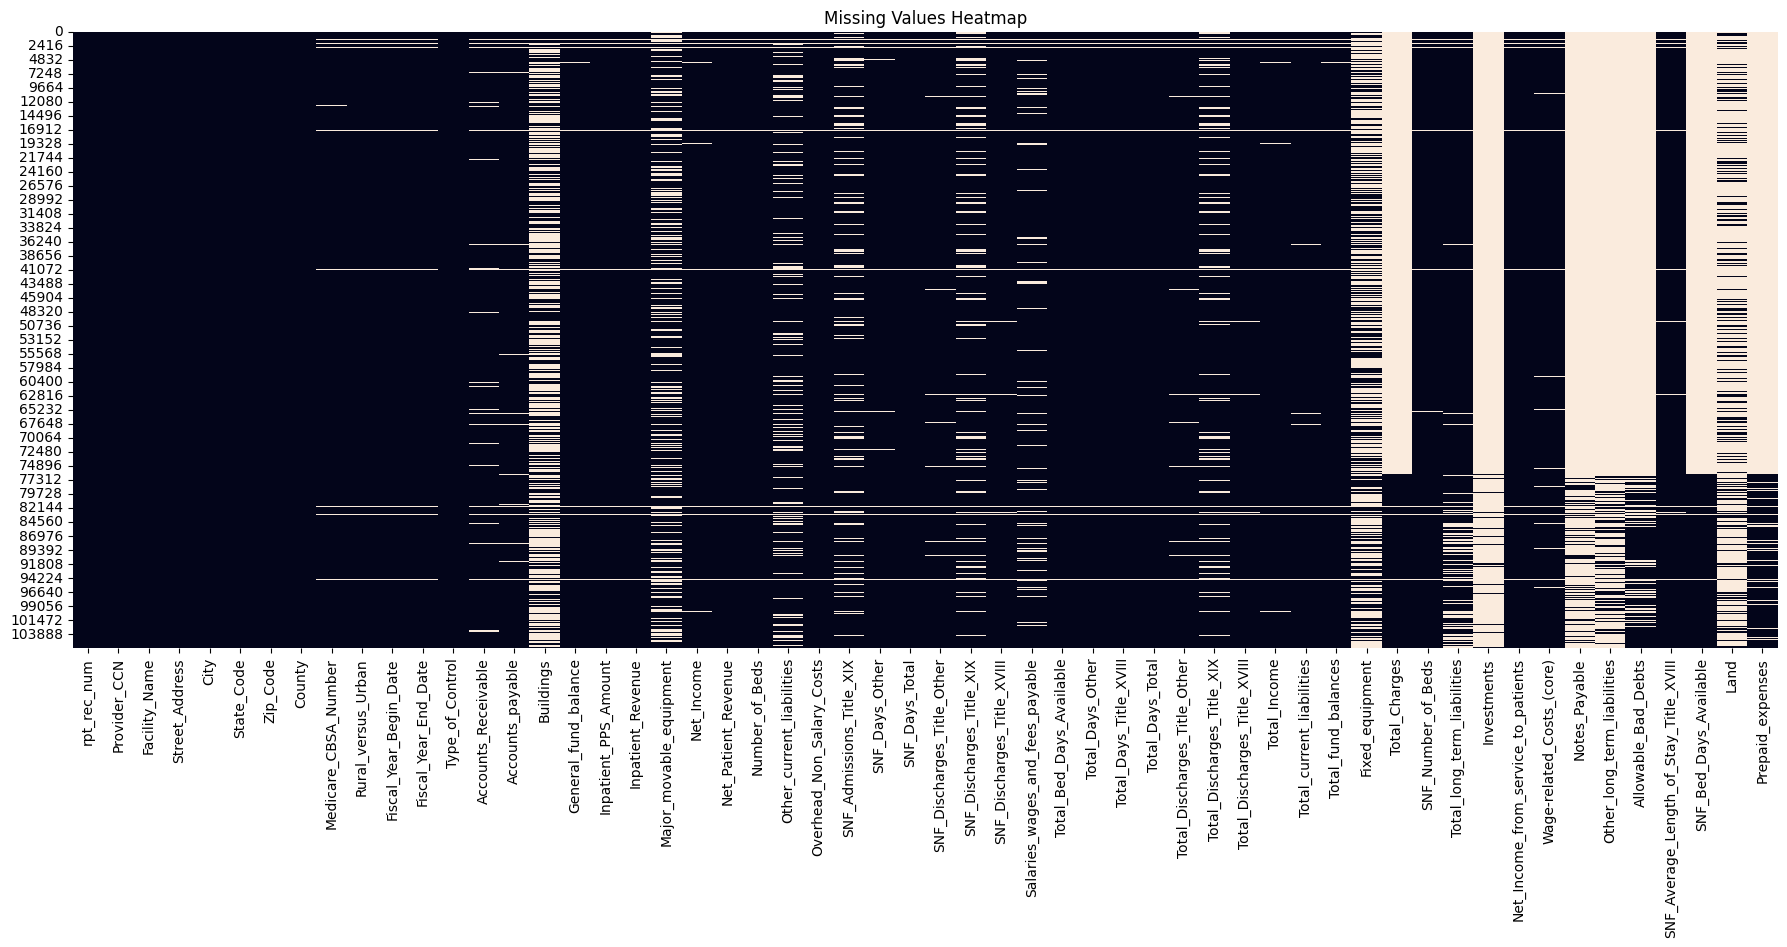

In [60]:
# Plot the missing values heatmap
plt.figure(figsize=(22, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

This dataset is pretty solid. There shouldn't be any bad multicollinearity. These are important variables. The only thing is that 7 are missing a lot of values. So I will focus to find a way to fill these in using formulas and educated averages. If I can I will keep them in.

In [61]:
# Count the total number of columns in df
num_columns = df.shape[1]

# Display the count
print(f"Total number of variables in df: {num_columns}")


Total number of variables in df: 56


In [62]:
# Calculate percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Select columns with more than 50% missing values
high_na_columns = missing_percentage[missing_percentage > 50].index.tolist()

# Display the columns
print("Columns with more than 50% missing values:")
print(high_na_columns)


Columns with more than 50% missing values:
['Buildings', 'Fixed_equipment', 'Total_Charges', 'Investments', 'Notes_Payable', 'Other_long_term_liabilities', 'Allowable_Bad_Debts', 'SNF_Bed_Days_Available', 'Land', 'Prepaid_expenses']


### Limitations
1. I have 10 variables that include a lot of NULLS. 
2. I dropped the columns that were 50% or more NA based on correlation but in groups. The groups were based on related words in the variable. I could've seperated it a different way statistically. 
3. I dropped the rest of the columns based on if they have multicollinearity within groups of columns. I seperated them into 4 groups using AI. And I dropped the multicollinearity columns with lesser of a correlation to Net_Income. 
4. We went from 90+ columns to 56.
5. It doesn't account for string variables. And I keep dates

In [63]:
# Export df_Cost to a CSV file
df.to_csv('df_filled_important_multicol.csv', index=False)
# then move it to the dataset folder

I will make another dataset. I want to make one that drops all the 10 variables that include 50% or more NAs. 

In [64]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Identify columns with more than 50% missing values
cols_to_drop = missing_percentage[missing_percentage > 50].index

# Drop the identified columns
df_cleaned = df.drop(columns=cols_to_drop)

# Display the columns that were dropped
print(f"Columns dropped due to >50% missing values: {list(cols_to_drop)}")

# Optionally, display the new shape of the dataset
print(f"New shape of df: {df_cleaned.shape}")

Columns dropped due to >50% missing values: ['Buildings', 'Fixed_equipment', 'Total_Charges', 'Investments', 'Notes_Payable', 'Other_long_term_liabilities', 'Allowable_Bad_Debts', 'SNF_Bed_Days_Available', 'Land', 'Prepaid_expenses']
New shape of df: (106269, 46)


### Limitations
1. I dropped 10 relevant variables bc of a 50% or more NAs. 
2. I dropped the columns that were 50% or more NA based on correlation but in groups. The groups were based on related words in the variable. I could've seperated it a different way statistically. 
3. I dropped the rest of the columns based on if they have multicollinearity within groups of columns. I seperated them into 4 groups using AI. And I dropped the multicollinearity columns with lesser of a correlation to Net_Income. 
4. We went from 90+ columns to 46.
5. It doesn't account for string variables. And I keep dates. 

In [65]:
# Export df_Cost to a CSV file
df_cleaned.to_csv('df_completelyfilled_important_multicol.csv', index=False)
# then move it to the dataset folder

This is the most complete dataset.

## Conclusion 

I have 4 datasets to put into cleaning:
1. Fully merged dataset, no edits. 93 columns. df_cost.csv
2. I removed Insignificant heavily NA columns. 83 columns. df_filled_important.csv
3. I took df_filled_important and removed columns with multicollinearity issues. 56 columns. df_filled_important_multicol.csv 
4. I took df_filled_important_multicol and took 10 variables out that had 50% or more NA columns. 46 columns. df_completelyfilled_important_multicol.csv

### Next Step

I will be taking the datasets from 4 to 1 and filling the NA... cleaning. (like the snaowball debt strategy, start with smaller first; plus I can apply those same filling techniques to the same columns in the larger datasets.)

### Go to data_cleaning_agent.ipynb OR ETL_Cost_2.ipynb

data_cleaning_agent is using very basic cleaning techniques. 

ETL_Cost_2 will take a more systematic approach with more advanced cleaning techniques. 